# RMD PST data Analysis

In [79]:
# Get the username and use that to set-up paths to data and figures
uname  = !whoami
uname = uname[0]
path2code = '/Users/' + uname + '/Work/Expts/Code/'
path2data = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Data/'
path2analysis = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/'
path2figs = '/Users/' + uname + '/Work/Expts/REWMEM/Version4/Analysis/RMD_PST/Figures/'

In [80]:
%cd {path2code}

import csv, misc, os, random, re, SelfRep
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

%R suppressMessages(library('lmerTest'))
%R suppressMessages(library('lsmeans'))
%R lsm.options(disable.pbkrtest=TRUE)
%R suppressMessages(library('effsize'))
%R suppressMessages(library('afex'))
%R suppressMessages(library('QuantPsyc')) 
%R suppressMessages(library('vcd'))

/Users/danieldillon/Work/Expts/Code
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['vcd', 'grid', 'QuantPsyc', 'MASS', 'boot', 'afex', 'reshape2',
       'effsize', 'lsmeans', 'estimability', 'lmerTest', 'lme4', 'Matrix',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='|S12')

In [81]:
def print_full(x):
    '''Print all rows of dataframe x'''
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    return(x)

# Self Report

In [82]:
# Assemble self-report and demographics
pd.options.mode.chained_assignment = None

demo = SelfRep.demo_proc(path2data + 'RMD_SelfReport.xlsx')
cc = SelfRep.cc_proc(path2data + 'RMD_SelfReport.xlsx')
bb = SelfRep.bb_proc(path2data + 'RMD_SelfReport.xlsx')
bdi = SelfRep.bdi_proc(path2data + 'RMD_SelfReport.xlsx')
masq = SelfRep.masq_proc(path2data + 'RMD_SelfReport.xlsx')
aes = SelfRep.aes_proc(path2data + 'RMD_SelfReport.xlsx')
stai = SelfRep.stai_proc(path2data + 'RMD_SelfReport.xlsx')
shaps = SelfRep.shaps_proc(path2data + 'RMD_SelfReport.xlsx')
psqi = SelfRep.psqi_proc(path2data + 'RMD_SelfReport.xlsx')
tci = SelfRep.tci_proc(path2data + 'RMD_SelfReport.xlsx')
neo = SelfRep.neo_proc(path2data + 'RMD_SelfReport.xlsx')
poms = SelfRep.poms_proc(path2data + 'RMD_SelfReport.xlsx')
wtar = SelfRep.wtar_proc(path2data + 'RMD_SelfReport.xlsx')

sr = pd.merge(left=demo,right=bdi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=cc,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=bb,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=masq,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=aes,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=stai,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=shaps,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=psqi,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=tci,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=neo,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=poms,left_on='subject',right_on='subject')
sr = pd.merge(left=sr,right=wtar,left_on='subject',right_on='subject')

# Drop the ineligible subjects and the pilot subjects
sr = sr[~((sr.Eligible == 0) | (sr.Group == 'Pilot'))]

In [83]:
sr.head()

Item subject Group  Age Gender Race Ethnicity  \
2     RMD003   MDD   43      F    W        NH   
3     RMD004    HC   37      M    W        NH   
4     RMD005    HC   27      M    W         H   
5     RMD006    HC   43      M    W        NH   
6     RMD007    HC   20      F    W        NH   

Item                                Marital_Status  \
2                                        Separated   
3                                    Never Married   
4                                    Never Married   
5     Married or living with someone as if married   
6                                    Never Married   

Item                  Education_Level  Education_Years   Occupation  \
2                   technical college               12         chef   
3                   four year college               16   Accountant   
4     graduate or professional school               17      Student   
5                   four year college               16  lab manager   
6                        some college               14      student   

Item      ...       NEO_C POMS_TenseAnx POMS_DepDeject  POMS_AngHost  \
2         ...          49             9             13            12   
3         ...          49             0              0             0   
4         ...          42             3              2             1   
5         ...          49             0              0             0   
6         ...          38             3              3             1   

Item  POMS_VigorAct  POMS_FatigueInert  POMS_ConfuseBewild  \
2                 1                  7                   4   
3                15                  3                   2   
4                11                  1                   4   
5                15                  0                   3   
6                 9                  6                   6   

Item  POMS_TotalMoodDisturb  WTAR_NatEng  WTAR_StdScore  
2                        44          yes             96  
3                       -10          yes            105  
4                         0          yes            121  
5                       -12          yes            114  
6                        10          yes            125  

[5 rows x 58 columns]

In [84]:
# How many eligible subjects per group?
sr.groupby('Group')['subject'].nunique()

Group
HC     41
MDD    40
Name: subject, dtype: int64

### *Demographics*

Group
HC     29.853659
MDD    30.000000
Name: Age, dtype: float64
Group
HC      8.670528
MDD    12.140207
Name: Age, dtype: float64
t(79) = -0.06, p = 0.950, g = -0.014


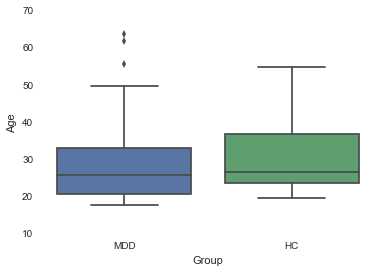

In [85]:
print sr.groupby('Group')['Age'].mean()
print sr.groupby('Group')['Age'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['Age'],sr[sr.Group == 'MDD']['Age'])
sns.boxplot(y='Age', x='Group', data = sr)

Group
HC     16.743902
MDD    15.937500
Name: Education_Years, dtype: float64
Group
HC     2.239202
MDD    2.810665
Name: Education_Years, dtype: float64
t(79) = 1.43, p = 0.157, g = 0.318


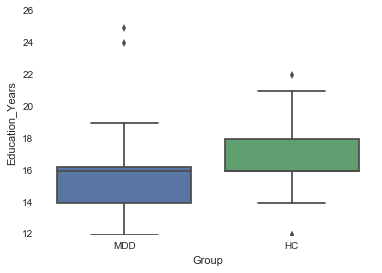

In [86]:
print sr.groupby('Group')['Education_Years'].mean()
print sr.groupby('Group')['Education_Years'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['Education_Years'],sr[sr.Group == 'MDD']['Education_Years'])
sns.boxplot(y='Education_Years', x='Group', data = sr)

### *BDI*

Group
HC      1.365854
MDD    28.350000
Name: BDI_total, dtype: float64
Group
HC     2.405786
MDD    8.036934
Name: BDI_total, dtype: float64
t(79) = -20.58, p = 0.000, g = -4.573


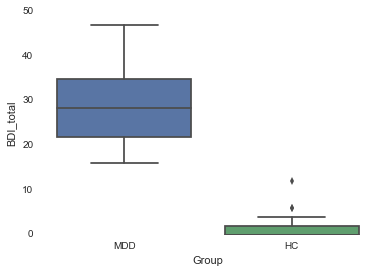

In [87]:
print sr.groupby('Group')['BDI_total'].mean()
print sr.groupby('Group')['BDI_total'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['BDI_total'],sr[sr.Group == 'MDD']['BDI_total'])

sns.boxplot(y='BDI_total', x='Group', data = sr)

### *BIS-BAS*

Between-group t-test on BIS
t(79) = -6.30, p = 0.000, g = -1.400
Between-group t-test on BAS_D
t(79) = 3.43, p = 0.001, g = 0.762
Between-group t-test on BAS_FS
t(79) = 4.15, p = 0.000, g = 0.922
Between-group t-test on BAS_RR
t(79) = 1.83, p = 0.072, g = 0.406


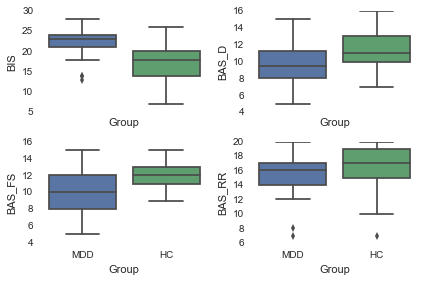

In [88]:
print 'Between-group t-test on BIS'
misc.ttest_2s(sr[sr.Group == 'HC']['BIS'],sr[sr.Group == 'MDD']['BIS'])
print 'Between-group t-test on BAS_D'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_D'],sr[sr.Group == 'MDD']['BAS_D'])
print 'Between-group t-test on BAS_FS'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_FS'],sr[sr.Group == 'MDD']['BAS_FS'])
print 'Between-group t-test on BAS_RR'
misc.ttest_2s(sr[sr.Group == 'HC']['BAS_RR'],sr[sr.Group == 'MDD']['BAS_RR'])


# fig = plt.figure()
# bis = fig.add_subplot(141)
# sns.boxplot(y='BIS', x='Group', data = sr)
# bis = fig.add_subplot(142)
# sns.boxplot(y='BAS_D', x='Group', data = sr)
# bas_fs = fig.add_subplot(143)
# sns.boxplot(y='BAS_FS', x='Group', data = sr)
# bas_rr = fig.add_subplot(144)
# sns.boxplot(y='BAS_RR', x='Group', data = sr)
# fig.tight_layout()

# A different look, just for fun . . . 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=False)
sns.boxplot(y='BIS',x='Group',data=sr,ax=ax1)
sns.boxplot(y='BAS_D',x='Group',data=sr,ax=ax2)
sns.boxplot(y='BAS_FS',x='Group',data=sr,ax=ax3)
sns.boxplot(y='BAS_RR',x='Group',data=sr,ax=ax4)
fig.tight_layout()

### *MASQ*

Between-group t-tests on MASQ_AD
t(79) = -18.31, p = 0.000, g = -4.069
Between-group t-tests on MASQ_GDD
t(79) = -16.12, p = 0.000, g = -3.582
Between-group t-tests on MASQ_AA
t(79) = -5.46, p = 0.000, g = -1.215
Between-group t-tests on MASQ_GDA
t(79) = -9.34, p = 0.000, g = -2.077


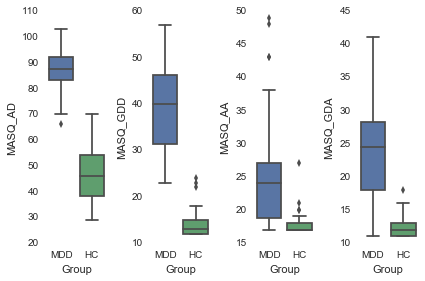

In [89]:
print 'Between-group t-tests on MASQ_AD'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AD'],sr[sr.Group == 'MDD']['MASQ_AD'])
print 'Between-group t-tests on MASQ_GDD'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDD'],sr[sr.Group == 'MDD']['MASQ_GDD'])
print 'Between-group t-tests on MASQ_AA'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_AA'],sr[sr.Group == 'MDD']['MASQ_AA'])
print 'Between-group t-tests on MASQ_GDA'
misc.ttest_2s(sr[sr.Group == 'HC']['MASQ_GDA'],sr[sr.Group == 'MDD']['MASQ_GDA'])

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=False)
sns.boxplot(y='MASQ_AD', x='Group', data=sr, ax=ax1)
sns.boxplot(y='MASQ_GDD', x='Group', data=sr, ax=ax2)
sns.boxplot(y='MASQ_AA', x='Group', data=sr, ax=ax3)
sns.boxplot(y='MASQ_GDA', x='Group', data=sr, ax=ax4)
fig.tight_layout()

### *AES*

Group
HC     23.731707
MDD    44.500000
Name: AES_total, dtype: float64
Group
HC     5.034999
MDD    6.300183
Name: AES_total, dtype: float64
t(79) = -16.41, p = 0.000, g = -3.647


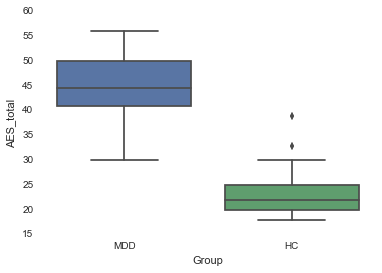

In [90]:
print sr.groupby('Group')['AES_total'].mean()
print sr.groupby('Group')['AES_total'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['AES_total'],sr[sr.Group == 'MDD']['AES_total'])

sns.boxplot(y='AES_total', x='Group', data = sr)

### *STAI*

Descriptive data: STAI Trait . . .
Group
HC     24.560976
MDD    45.075000
Name: STAI_Trait, dtype: float64
Group
HC      4.111258
MDD    10.178881
Name: STAI_Trait, dtype: float64
t(79) = -11.95, p = 0.000, g = -2.655

Descriptive data: STAI State . . .
Group
HC     27.804878
MDD    58.725000
Name: STAI_State, dtype: float64
Group
HC     6.630307
MDD    8.255495
Name: STAI_State, dtype: float64
t(79) = -18.61, p = 0.000, g = -4.135


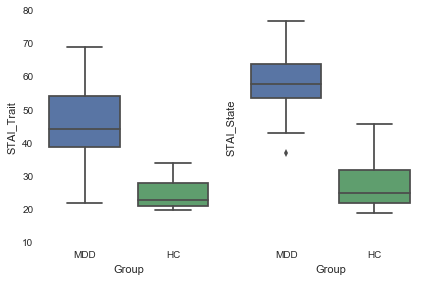

In [91]:
print 'Descriptive data: STAI Trait . . .'
print sr.groupby('Group')['STAI_Trait'].mean()
print sr.groupby('Group')['STAI_Trait'].std()
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_Trait'],sr[sr.Group == 'MDD']['STAI_Trait'])

print '\nDescriptive data: STAI State . . .'
print sr.groupby('Group')['STAI_State'].mean()
print sr.groupby('Group')['STAI_State'].std()
misc.ttest_2s(sr[sr.Group == 'HC']['STAI_State'],sr[sr.Group == 'MDD']['STAI_State'])

fig, (ax1, ax2) = plt.subplots(1,2,sharex=True, sharey=True)
sns.boxplot(y='STAI_Trait', x='Group', data=sr, ax=ax1)
sns.boxplot(y='STAI_State', x='Group', data=sr, ax=ax2)
fig.tight_layout()

### *SHAPS*

Group
HC     0.365854
MDD    5.475000
Name: SHAPS, dtype: float64
Group
HC     0.733352
MDD    3.250148
Name: SHAPS, dtype: float64
t(79) = -9.81, p = 0.000, g = -2.181


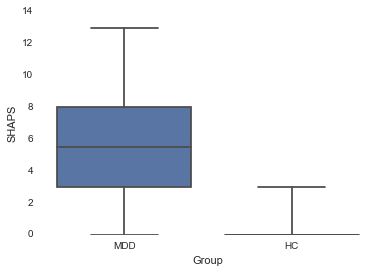

In [92]:
print sr.groupby('Group')['SHAPS'].mean()
print sr.groupby('Group')['SHAPS'].std()

misc.ttest_2s(sr[sr.Group == 'HC']['SHAPS'],sr[sr.Group == 'MDD']['SHAPS'])
sns.boxplot(y='SHAPS', x='Group', data = sr)

### *PSQI*

PSQI duration
t(79) = -2.01, p = 0.048, g = -0.446
PSQI Distubance
t(79) = -2.35, p = 0.021, g = -0.523
PSQI Latency
t(78) = -2.88, p = 0.005, g = -0.644
PSQI Daytime Disturbance
t(79) = -13.74, p = 0.000, g = -3.054
PSQI Efficiency
t(79) = -2.63, p = 0.010, g = -0.585
PSQI Quality
t(78) = -3.83, p = 0.000, g = -0.858
PSQI Medication
t(79) = -0.72, p = 0.474, g = -0.160
PSQI Total
t(77) = -6.66, p = 0.000, g = -1.497


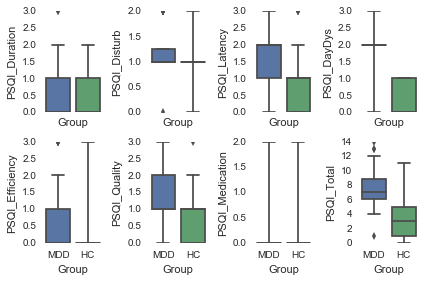

In [93]:
print 'PSQI duration'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Duration'],sr[sr.Group == 'MDD']['PSQI_Duration'])
print 'PSQI Distubance'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Disturb'],sr[sr.Group == 'MDD']['PSQI_Disturb'])
print 'PSQI Latency'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Latency'],sr[sr.Group == 'MDD']['PSQI_Latency'])
print 'PSQI Daytime Disturbance'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_DayDys'],sr[sr.Group == 'MDD']['PSQI_DayDys'])
print 'PSQI Efficiency'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Efficiency'],sr[sr.Group == 'MDD']['PSQI_Efficiency'])
print 'PSQI Quality'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Quality'],sr[sr.Group == 'MDD']['PSQI_Quality'])
print 'PSQI Medication'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Medication'],sr[sr.Group == 'MDD']['PSQI_Medication'])
print 'PSQI Total'
misc.ttest_2s(sr[sr.Group == 'HC']['PSQI_Total'],sr[sr.Group == 'MDD']['PSQI_Total'])

fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2,4,sharex=True,sharey=False)
sns.boxplot(y='PSQI_Duration', x='Group', data=sr,ax=ax1)
sns.boxplot(y='PSQI_Disturb', x='Group', data=sr,ax=ax2)
sns.boxplot(y='PSQI_Latency', x='Group', data=sr,ax=ax3)
sns.boxplot(y='PSQI_DayDys', x='Group', data=sr,ax=ax4)

sns.boxplot(y='PSQI_Efficiency', x='Group', data=sr,ax=ax5)
sns.boxplot(y='PSQI_Quality', x='Group', data=sr,ax=ax6)
sns.boxplot(y='PSQI_Medication', x='Group', data=sr,ax=ax7)
sns.boxplot(y='PSQI_Total', x='Group', data=sr,ax=ax8)

fig.tight_layout()

### *TCI*

Novelty Seeking
t(79) = -1.10, p = 0.275, g = -0.244
Harm Avoidance
t(79) = -10.29, p = 0.000, g = -2.286
Reward Dependence
t(79) = 2.81, p = 0.006, g = 0.623
Persistence
t(79) = 8.21, p = 0.000, g = 1.824
Self-Directedness
t(79) = 11.71, p = 0.000, g = 2.602
Cooperativeness
t(79) = 3.27, p = 0.002, g = 0.727
Self Transcendence
t(79) = 1.42, p = 0.160, g = 0.315


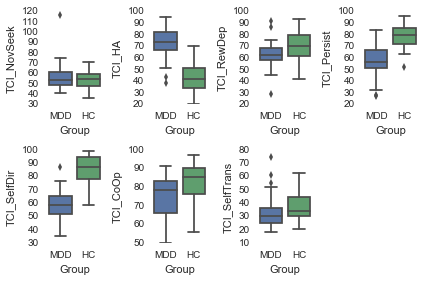

In [94]:
print 'Novelty Seeking'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_NovSeek'],sr[sr.Group == 'MDD']['TCI_NovSeek'])
print 'Harm Avoidance'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_HA'],sr[sr.Group == 'MDD']['TCI_HA'])
print 'Reward Dependence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_RewDep'],sr[sr.Group == 'MDD']['TCI_RewDep'])
print 'Persistence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_Persist'],sr[sr.Group == 'MDD']['TCI_Persist'])
print 'Self-Directedness'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfDir'],sr[sr.Group == 'MDD']['TCI_SelfDir'])
print 'Cooperativeness'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_CoOp'],sr[sr.Group == 'MDD']['TCI_CoOp'])
print 'Self Transcendence'
misc.ttest_2s(sr[sr.Group == 'HC']['TCI_SelfTrans'],sr[sr.Group == 'MDD']['TCI_SelfTrans'])

fig = plt.figure()
nov = fig.add_subplot(241)
sns.boxplot(y='TCI_NovSeek', x='Group', data = sr)
ha = fig.add_subplot(242)
sns.boxplot(y='TCI_HA', x='Group', data = sr)
rewd = fig.add_subplot(243)
sns.boxplot(y='TCI_RewDep', x='Group', data = sr)
per = fig.add_subplot(244)
sns.boxplot(y='TCI_Persist', x='Group', data = sr)
self = fig.add_subplot(245)
sns.boxplot(y='TCI_SelfDir', x='Group', data = sr)
coop = fig.add_subplot(246)
sns.boxplot(y='TCI_CoOp', x='Group', data = sr)
med = fig.add_subplot(247)
sns.boxplot(y='TCI_SelfTrans', x='Group', data = sr) 
fig.tight_layout()

### *NEO*

Neuroticism
t(79) = -16.96, p = 0.000, g = -3.769
Extraversion
t(79) = 10.30, p = 0.000, g = 2.290
Openness to Experience
t(79) = 0.72, p = 0.471, g = 0.161
Agreeableness
t(79) = 2.59, p = 0.012, g = 0.575
Conscientiousness
t(79) = 8.19, p = 0.000, g = 1.821


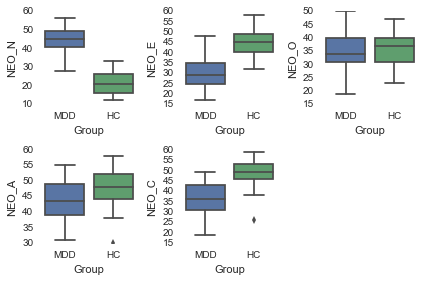

In [95]:
print 'Neuroticism'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_N'],sr[sr.Group == 'MDD']['NEO_N'])
print 'Extraversion'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_E'],sr[sr.Group == 'MDD']['NEO_E'])
print 'Openness to Experience'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_O'],sr[sr.Group == 'MDD']['NEO_O'])
print 'Agreeableness'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_A'],sr[sr.Group == 'MDD']['NEO_A'])
print 'Conscientiousness'
misc.ttest_2s(sr[sr.Group == 'HC']['NEO_C'],sr[sr.Group == 'MDD']['NEO_C'])

fig = plt.figure()
neur = fig.add_subplot(231)
sns.boxplot(y='NEO_N', x='Group', data = sr)
ext = fig.add_subplot(232)
sns.boxplot(y='NEO_E', x='Group', data = sr)
ope = fig.add_subplot(233)
sns.boxplot(y='NEO_O', x='Group', data = sr)
agr = fig.add_subplot(234)
sns.boxplot(y='NEO_A', x='Group', data = sr)
con = fig.add_subplot(235)
sns.boxplot(y='NEO_C', x='Group', data = sr)
fig.tight_layout()

### *POMS*

Tension-Anxiety
t(79) = -10.45, p = 0.000, g = -2.321
Depression
t(79) = -15.96, p = 0.000, g = -3.547
Anger-Hostility
t(79) = -6.22, p = 0.000, g = -1.383
Vigor-Activity
t(79) = 13.15, p = 0.000, g = 2.922
Fatigue
t(79) = -14.93, p = 0.000, g = -3.319
Confusion-Bewilderment
t(79) = -3.57, p = 0.001, g = -0.793
Total Mood Disturbance
t(79) = -16.70, p = 0.000, g = -3.710


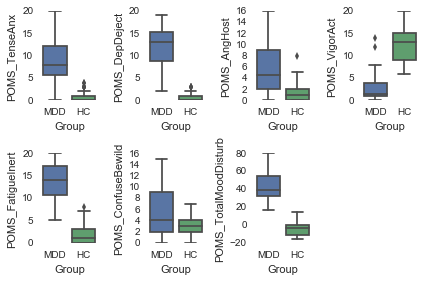

In [96]:
print 'Tension-Anxiety'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TenseAnx'],sr[sr.Group == 'MDD']['POMS_TenseAnx'])

print 'Depression'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_DepDeject'],sr[sr.Group == 'MDD']['POMS_DepDeject'])

print 'Anger-Hostility'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_AngHost'],sr[sr.Group == 'MDD']['POMS_AngHost'])

print 'Vigor-Activity'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_VigorAct'],sr[sr.Group == 'MDD']['POMS_VigorAct'])

print 'Fatigue'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_FatigueInert'],
              sr[sr.Group == 'MDD']['POMS_FatigueInert'])

print 'Confusion-Bewilderment'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_ConfuseBewild'],
              sr[sr.Group == 'MDD']['POMS_ConfuseBewild'])

print 'Total Mood Disturbance'
misc.ttest_2s(sr[sr.Group == 'HC']['POMS_TotalMoodDisturb'],
              sr[sr.Group == 'MDD']['POMS_TotalMoodDisturb'])

fig = plt.figure()
tax = fig.add_subplot(241)
sns.boxplot(y='POMS_TenseAnx', x='Group', data = sr)
dep = fig.add_subplot(242)
sns.boxplot(y='POMS_DepDeject', x='Group', data = sr)
ah = fig.add_subplot(243)
sns.boxplot(y='POMS_AngHost', x='Group', data = sr)
va = fig.add_subplot(244)
sns.boxplot(y='POMS_VigorAct', x='Group', data = sr)
fat = fig.add_subplot(245)
sns.boxplot(y='POMS_FatigueInert', x='Group', data = sr)
cb = fig.add_subplot(246)
sns.boxplot(y='POMS_ConfuseBewild', x='Group', data = sr)
tot = fig.add_subplot(247)
sns.boxplot(y='POMS_TotalMoodDisturb', x='Group', data = sr)
fig.tight_layout()

### *WTAR*

WTAR
t(79) = 0.02, p = 0.985, g = 0.004


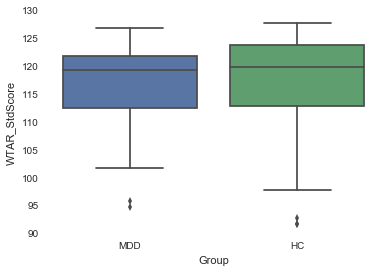

In [97]:
print 'WTAR'
misc.ttest_2s(sr[sr.Group == 'HC']['WTAR_StdScore'],sr[sr.Group == 'MDD']['WTAR_StdScore'])

sns.boxplot(y='WTAR_StdScore', x='Group', data=sr)

# PST Train

In [98]:
# Assemble the PST training data

%cd {path2data}

train_dfs = []
train_d = re.compile('fMRI_train')

subjects = !ls -d RMD0*

for subject in subjects:
    file_list = [] # Some subjects have multiple training files, e.g. due to restart after scanner issue.
    curr_path = path2data + subject + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            train_m = train_d.search(filename)
            if train_m:
                file_path = curr_path + filename
                file_list.append(file_path)

    newest_train_file = file_list[-1:][0] # Select the newest training file as it's most likely to be correct.
#     print newest_train_file
    train_df = pd.read_csv(newest_train_file)
    train_df['subject'] = subject
    train_dfs.append(train_df)
                
train_data = pd.concat(train_dfs)
train_data['lnRT'] = train_data.trial_RT.apply(np.log)
train_columns = ['subject','group','trial_num','block','trial_RT','lnRT','accuracy',
                 'left_stim','left_stim_number','right_stim','right_stim_number',
                 'object_onset','object_duration','response','response_onset','isi_onset',
                 'isi_duration','scheduled_outcome','feedback','feedback_onset',
                 'feedback_duration','iti_onset','iti_duration']

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [99]:
train_data['group'].replace(0, 'HC',inplace=True)
train_data['group'].replace(1, 'MDD',inplace=True)

train_data = train_data.reindex(columns=train_columns)

In [100]:
#Merging the PST train data with the self report data
train_full = pd.merge(left=train_data, right=sr, left_on='subject',right_on='subject')

In [101]:
def OutCheck(in_df):
    """Function to look for outliers, judged based on lnRT."""
    dfs = []
    for sub in in_df.subject.unique():
        outlier = []
        sdf = in_df[in_df.subject == sub]
        for i, row_i in sdf.iterrows():
            if row_i.trial_RT < 0.01: # Added to catch trials with too fast RTs (< 100 ms)
                outlier.append(1)
            elif np.isnan(row_i.lnRT):
                outlier.append(np.nan)
            elif abs(row_i.lnRT-sdf.lnRT.mean()) <= sdf.lnRT.std()*3:
                outlier.append(0)
            else:
                outlier.append(1)
        sdf['outlier'] = outlier
        dfs.append(sdf)
    out = pd.concat(dfs)
    return out

train = OutCheck(train_full)

In [102]:
# Not many outliers--fewer than 1.7% of training trials, on average, per group
df = misc.MakeFrame(in_df=train,id_vars=['group','subject'],dv='outlier')
df['out_pct'] = df.outlier*100

print df.groupby('group')['out_pct'].mean()
print df.groupby('group')['out_pct'].std()

group
HC     1.605691
MDD    1.400896
Name: out_pct, dtype: float64
group
HC     2.387324
MDD    2.231630
Name: out_pct, dtype: float64


In [103]:
# Let's look at the number of no-response trials by subject . . . this only partially matches with the <90% below.
# RMD039 is not in that last, but RMD045 is and here he/she appears to have only 1 no-resp trial. Similar with RMD082,
# only 11 no-resp trials here but is on the list below. What explains the difference? 

# RMD045 only completed 3 blocks and thus is missing 60 trials--with 1 no-resp and 179 trials
# with a response, that's 180 trials = 3 blocks x 60 trials per block. No explanation in Notes.

# RMD082 only completed 131 trials--got up to trial 11 of block 3, then stopped. Consistent with Notes, which 
# indicate that this subject was removed from scanner.

no_resp = train[train.trial_RT == 999]
no_resp['subject'].value_counts()

RMD039    77
RMD077    51
RMD068    50
RMD006    49
RMD015    39
RMD029    24
RMD091    22
RMD019    21
RMD081    20
RMD064    20
RMD092    18
RMD007    17
RMD017    16
RMD055    12
RMD021    12
RMD082    11
RMD028    11
RMD069    11
RMD044     9
RMD020     8
RMD013     7
RMD050     6
RMD061     6
RMD051     5
RMD037     3
RMD070     3
RMD089     3
RMD036     3
RMD084     3
RMD090     3
RMD004     3
RMD005     3
RMD098     2
RMD086     2
RMD048     2
RMD071     2
RMD010     2
RMD085     2
RMD038     2
RMD042     2
RMD078     2
RMD046     2
RMD035     1
RMD018     1
RMD034     1
RMD011     1
RMD016     1
RMD049     1
RMD079     1
RMD054     1
RMD053     1
RMD009     1
RMD065     1
RMD057     1
RMD043     1
RMD041     1
RMD066     1
RMD003     1
RMD045     1
RMD067     1
Name: subject, dtype: int64

In [104]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(train[train.trial_RT == 999])) 
train_clean = train[~((train.trial_RT == 999) | (train.outlier == 1))]

Number of trials with no response: 584


In [105]:
def make_pair(left_stim):
    '''Use the left stimulus number to deduce what pair was onscreen, then return it.'''
    d = {1:'AB', 2:'CD',3:'EF',4:'EF',5:'CD',6:'AB'}
    pair = d[left_stim]
    return pair

train_clean['pair'] = train_clean.left_stim_number.apply(make_pair)

In [106]:
# Looks right . . . 
train_clean[['left_stim_number','right_stim_number','pair']].head()

left_stim_number  right_stim_number pair
0                 2                  5   CD
1                 3                  4   EF
2                 1                  6   AB
3                 1                  6   AB
4                 5                  2   CD

In [107]:
# Find out which participants responded <90% of the time, and put them in a list so we can exclude them for 
# all the upcoming analyses. Don't exclude RMD045, though, as he/she has only 3 blocks but data are clean.

asleep = []
g = train_clean.groupby(['subject', 'group']).trial_num.count()
df = g.to_frame()
df.reset_index(inplace=True)

for i, row_i in df.iterrows():
    if row_i.trial_num < 216 and row_i.subject != 'RMD045':
        print row_i.subject, row_i.group, row_i.trial_num
        asleep.append(row_i.subject)

RMD006 HC 191
RMD015 HC 201
RMD039 HC 139
RMD068 MDD 190
RMD077 MDD 189
RMD082 MDD 120


In [108]:
asleep

['RMD006', 'RMD015', 'RMD039', 'RMD068', 'RMD077', 'RMD082']

I think it makes sense to drop these subjects, with the exception of RMD045 who completed 3 blocks with only 1 non-response. We can run the analyses with and without them and report the data both ways, but for now I will drop.

In [109]:
train_clean = train_clean[~(train_clean.subject.isin(asleep))]
train_clean.reset_index(inplace=True)

### Train Reaction Time

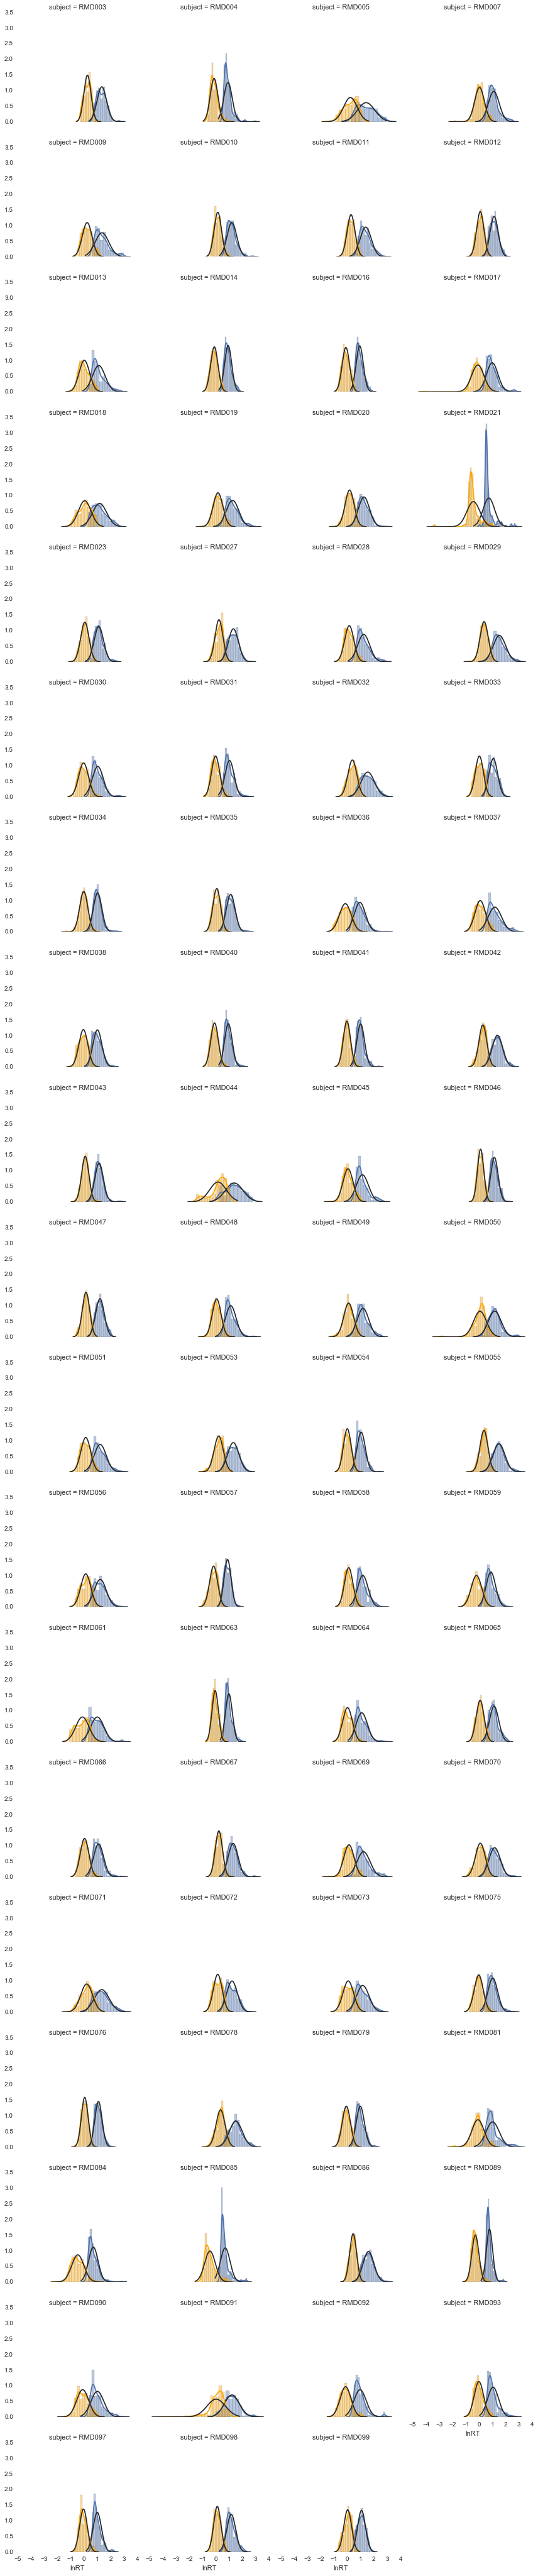

In [110]:
# Single subject data, raw and log transformed RT with normal distribution overlaid to detect deviations.
# lnRT is a definite improvement; note that some people have bimodal distributions (RMD048) and/or some very long
# RTs (RMD029)
g = sns.FacetGrid(data=train_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm)
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

DA function declines with Age, so I'm adding that to all analyses as a covariate.

In [111]:
# Cleaning up a couple of variables, then pushing to R

train_clean.Education_Level = train_clean.Education_Level.astype(str)
train_clean.Occupation = train_clean.Occupation.astype(str)
train_clean['Highest Degree'] = train_clean['Highest Degree'].astype(str)
train_clean.Income = train_clean.Income.astype(str)
del train_clean['Notes']

%Rpush train_clean
# %R str(train_clean) # Always run this to take a look at what you have
%R train_clean$block <- as.factor(train_clean$block)

%R train_rt.acov <- aov_ez(id='subject', dv='lnRT', data=train_clean, between='group', within=c('pair','block'),\
                         covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))
%R print(train_rt.acov) # Main effects of Age, Group, and Block

Anova Table (Type 3 tests)

Response: lnRT
             Effect           df  MSE      F  pes p.value
1             group        1, 71 0.35 3.89 +  .05     .05
2               Age        1, 71 0.35 3.85 +  .05     .05
3              pair 1.97, 140.03 0.04   1.25  .02     .29
4        group:pair 1.97, 140.03 0.04   0.43 .006     .65
5          Age:pair 1.97, 140.03 0.04   0.54 .008     .58
6             block 1.77, 125.69 0.08 4.26 *  .06     .02
7       group:block 1.77, 125.69 0.08   0.30 .004     .71
8         Age:block 1.77, 125.69 0.08   0.34 .005     .68
9        pair:block 5.04, 357.77 0.01   1.36  .02     .24
10 group:pair:block 5.04, 357.77 0.01   0.87  .01     .50
11   Age:pair:block 5.04, 357.77 0.01   1.20  .02     .31

Sphericity correction method: GG 


Correlation between Age and training RT, r = 0.245, p = 0.0343.


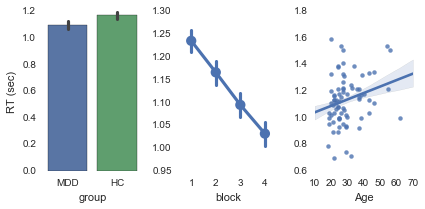

In [144]:
# Plotting the effects
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=False,figsize=(6,3))
sns.barplot(y='trial_RT',x='group',units='subject',ci=68,data=train_clean,ax=ax1)
ax1.set_ylabel('RT (sec)')
sns.pointplot(y='trial_RT',x='block',units='subject',ci=68,data=train_clean,ax=ax2)
ax2.set_ylabel('')

# Average within subjects for the correlation with Age . . . 
df = misc.MakeFrame(in_df=train_clean,id_vars=['subject','group','Age'],dv='trial_RT')
sns.regplot(y='trial_RT',x='Age',ci=68,data=df,ax=ax3)
ax3.set_ylabel('')

fig.tight_layout()
fig.savefig(path2figs + 'RMD_PST_train_RT.pdf')

r, p = sp.stats.pearsonr(df.Age,df.trial_RT)
print 'Correlation between Age and training RT, r = ' + '{:.3}'.format(r) + ', p = ' + '{:.3}'.format(p) + '.'

In [142]:
# Follow-up the Block effect . . . all pairwise comparisons are significant

%R block_RT.lsm <- lsmeans(train_rt.acov, ~ block)
%R print(block_RT.lsm) # Shows the least square means, looks right
%R print(pairs(block_RT.lsm)) # All pairwise comparisons are significant

/Users/danieldillon/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: NOTE: Results are based on intra-block estimates.

  warnings.warn(x, RRuntimeWarning)
/Users/danieldillon/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: NOTE: Results may be misleading due to involvement in interactions

  warnings.warn(x, RRuntimeWarning)


 block     lsmean         SE    df      lower.CL  upper.CL
 X1    0.27151207 0.06738919 75.32  0.1372752613 0.4057489
 X2    0.20071145 0.06738919 75.32  0.0664746347 0.3349483
 X3    0.13328856 0.06738919 75.32 -0.0009482562 0.2675254
 X4    0.07242416 0.06740358 75.38 -0.0618394706 0.2066878

Results are averaged over the levels of: group, pair 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 X1 - X2  0.07080063 0.02091762 212   3.385  0.0047
 X1 - X3  0.13822352 0.02091762 212   6.608  <.0001
 X1 - X4  0.19908792 0.02101013 212   9.476  <.0001
 X2 - X3  0.06742289 0.02091762 212   3.223  0.0079
 X2 - X4  0.12828729 0.02101013 212   6.106  <.0001
 X3 - X4  0.06086440 0.02101013 212   2.897  0.0215

Results are averaged over the levels of: group, pair 
P value adjustment: tukey method for comparing a family of 4 estimates 


### Train Accuracy

In [145]:
# Group x Block x Pair, with Age as a covariate

%R train_acc.acov <- aov_ez(id='subject', dv='accuracy', data=train_clean, between='group',within=c('pair','block'),\
                          covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))

%R print (train_acc.acov) # Pair x Block and Age x Pair x Block interactions

Anova Table (Type 3 tests)

Response: accuracy
             Effect           df  MSE       F  pes p.value
1             group        1, 71 0.15    0.70 .010     .41
2               Age        1, 71 0.15    0.58 .008     .45
3              pair 1.56, 111.06 0.09    2.31  .03     .12
4        group:pair 1.56, 111.06 0.09    0.50 .007     .56
5          Age:pair 1.56, 111.06 0.09    1.08  .01     .33
6             block 2.67, 189.42 0.04    0.67 .009     .55
7       group:block 2.67, 189.42 0.04    1.10  .02     .35
8         Age:block 2.67, 189.42 0.04    0.63 .009     .58
9        pair:block 5.34, 378.90 0.02 3.80 **  .05    .002
10 group:pair:block 5.34, 378.90 0.02    0.90  .01     .49
11   Age:pair:block 5.34, 378.90 0.02 3.94 **  .05    .001

Sphericity correction method: GG 


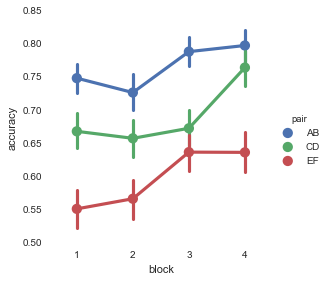

In [151]:
# Here's the Pair x Block interaction . . . I'm not going further with the Age x Pair x Block b/c I'd have to 
# dichotomize on Age, which is artificial, and at any rate I don't care about Age all that much (just don't want it
# obscuring any Group differences).

sns.factorplot(y='accuracy',x='block',hue='pair',hue_order=['AB','CD','EF'],units='subject',ci=68,
               data=train_clean)
sns.plt.savefig(path2figs + 'RMD_PST_train_acc.pdf')

In [152]:
# Now use lsmeans to decompose the Pair x Block effect. Basically, accuracy on AB starts high and stays high,
# accuracy on CD and EF improve over time (but it's a bit bumpy), accuracy on AB is always better than accuracy on EF,
# and accuracy on CD is intermediate, better than EF in Blocks 1 and 4. All this is with Tukey HSD so the correction
# is relatively stringent due to the number of comparisons.

# Okay, slicing by Pair first . . . 
# AB does not differ significantly over the blocks;
# CD: Blk4 > Blk 1|Blk 2|Blk 3 ( Blk 4 > Blk 3, p = 0.06)
# EF: Blk 4|Blk 3 > Blk 1 (trends)

# Now slice by Block . . . 
# Block 1: AB|CD > EF; Block 2: AB > EF; Block 3: AB > CD|EF; Block 4: AB|CD > EF

%R pb_acc.lsm <- lsmeans(train_acc.acov, ~ block*pair)
%R print(pb_acc.lsm) # Looks right . . . 
%R print(pairs(pb_acc.lsm))

 block pair    lsmean         SE     df  lower.CL  upper.CL
 X1    AB   0.7114173 0.04749361 106.08 0.6172574 0.8055771
 X2    AB   0.6910108 0.04749361 106.08 0.5968510 0.7851706
 X3    AB   0.7528596 0.04749361 106.08 0.6586997 0.8470194
 X4    AB   0.7585967 0.04752718 106.38 0.6643733 0.8528201
 X1    CD   0.6320735 0.04749361 106.08 0.5379136 0.7262333
 X2    CD   0.6201332 0.04749361 106.08 0.5259734 0.7142931
 X3    CD   0.6386078 0.04749361 106.08 0.5444480 0.7327677
 X4    CD   0.7251413 0.04752718 106.38 0.6309179 0.8193647
 X1    EF   0.5149963 0.04749361 106.08 0.4208365 0.6091562
 X2    EF   0.5304614 0.04749361 106.08 0.4363015 0.6246212
 X3    EF   0.5997327 0.04749361 106.08 0.5055728 0.6938925
 X4    EF   0.6020463 0.04752718 106.38 0.5078229 0.6962697

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast          estimate         SE     df t.ratio p.value
 X1,AB - X2,AB  0.020406464 0.02682716 594.43   0.761  0.9998
 X1,AB - X3,AB -0.041442299 0.02682716 594.43  -1.545  0.9274
 X1,AB - X4,AB -0.047179448 0.02694580 594.43  -1.751  0.8435
 X1,AB - X1,CD  0.079343805 0.03026671 403.86   2.621  0.2712
 X1,AB - X2,CD  0.091284037 0.03241372 485.05   2.816  0.1764
 X1,AB - X3,CD  0.072809439 0.03241372 485.05   2.246  0.5168
 X1,AB - X4,CD -0.013724054 0.03247207 486.38  -0.423  1.0000
 X1,AB - X1,EF  0.196420951 0.03026671 403.86   6.490  <.0001
 X1,AB - X2,EF  0.180955906 0.03241372 485.05   5.583  <.0001
 X1,AB - X3,EF  0.111684579 0.03241372 485.05   3.446  0.0302
 X1,AB - X4,EF  0.109370984 0.03247207 486.38   3.368  0.0386
 X2,AB - X3,AB -0.061848763 0.02682716 594.43  -2.305  0.4738
 X2,AB - X4,AB -0.067585912 0.02694580 594.43  -2.508  0.3367
 X2,AB - X1,CD  0.058937342 0.03241372 485.05   1.818  0.8074
 X2,AB - X2,CD  0.070877573 0.03026671 403.86   2.342  0.4487
 X2,AB -

In [153]:
# Let's take a look at how often people selected the various stimuli, so we can test out my 'AvoidB accuracy depends
# on how often you chose B during training' hypothesis . . . 

def CodeChoice(data):
    '''Use position of stimuli on screen and response to code choice.'''
    s = {1:'A', 2:'C', 3:'E', 4:'F', 5:'D', 6:'B'}
    
    left_stim, right_stim, response = data
    
    if pd.isnull(response):
        choice = np.nan
    elif response == 'left':
        choice = s[left_stim]
    elif response == 'right':
        choice = s[right_stim]
    
    return choice

train_clean['choice'] = train_clean[['left_stim_number','right_stim_number','response']].apply(CodeChoice,axis=1)
train_clean[['left_stim_number','right_stim_number','response','choice']].head()

left_stim_number  right_stim_number response choice
0                 2                  5    right      D
1                 3                  4    right      F
2                 1                  6     left      A
3                 1                  6    right      B
4                 5                  2     left      D

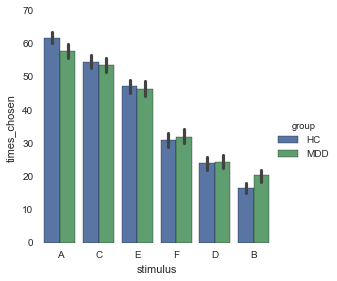

In [161]:
# Interesting pattern in the data below . . . HC > MDD for all the "good" stimuli, MDD > HC for all the "bad" stimuli.
# This is a remarkably clear graph, one of the best I've seen (ever, and certainly for the PST) . . . 

g = train_clean.groupby(['group','subject','Age'])['choice'].value_counts()
df = g.to_frame()
df.reset_index(inplace=True)
new_cols = ['group','subject','Age','stimulus','times_chosen']
df.columns = new_cols
# print df.head(13)
sns.factorplot(y='times_chosen',x='stimulus',order=['A','C','E','F','D','B'], hue='group',units='subject',
               kind='bar',ci=68,data=df)
sns.plt.savefig(path2figs + 'RMD_PST_Train_Choices.pdf')

In [162]:
# I'll run a 2 Group x 2 Stimulus (A,B) ANCOVA on choice, with Age as a covariate.
# (This was significant the first time I ran it, as an ANOVA, not now . . . hopefully will be with more subjects)

choose_ab = df[(df.stimulus == 'A') | (df.stimulus == 'B')]

%Rpush choose_ab
%R choose_ab.acov <- aov_ez(id='subject', dv='times_chosen', within='stimulus', between='group',\
                            covariate='Age', factorize=FALSE, anova_table=list(correction='GG',es='pes'),\
                            data=choose_ab)
%R print(choose_ab.acov)

Anova Table (Type 3 tests)

Response: times_chosen
          Effect    df    MSE         F    pes p.value
1          group 1, 72   4.80      0.01 <.0001     .94
2            Age 1, 72   4.80      1.42    .02     .24
3       stimulus 1, 72 236.68 20.71 ***    .22  <.0001
4 group:stimulus 1, 72 236.68      2.34    .03     .13
5   Age:stimulus 1, 72 236.68      0.29   .004     .59

Sphericity correction method: GG 


In [163]:
# Run the follow-up tests . . . (this is a holdover from when the interaction was significant)
%R choose_ab.lsm <- lsmeans(choose_ab.acov, ~ stimulus * group)
%R print(choose_ab.lsm) # Looks right

# Okay to turn correction off here b/c only care about HC vs. MDD for A and B, and if
# the correction is not turned off we will adjust for 4 more tests we don't care about . . .
%R print(pairs(choose_ab.lsm,adjust='none')) # HC > MDD for choosing A was sig, now not. Not super strong . . . 

 stimulus group   lsmean       SE    df lower.CL upper.CL
 A        HC    62.51263 1.883245 87.65 58.76987 66.25539
 B        HC    17.16761 1.883245 87.65 13.42485 20.91036
 A        MDD   58.63497 1.911049 88.24 54.83731 62.43263
 B        MDD   20.99694 1.911049 88.24 17.19928 24.79460

Confidence level used: 0.95 


 contrast        estimate       SE    df t.ratio p.value
 A,HC - B,HC    45.345023 3.560674 71.00  12.735  <.0001
 A,HC - A,MDD    3.877659 2.559479 73.88   1.515  0.1340
 A,HC - B,MDD   41.515686 2.559479 73.88  16.220  <.0001
 B,HC - A,MDD  -41.467364 2.559479 73.88 -16.201  <.0001
 B,HC - B,MDD   -3.829336 2.559479 73.88  -1.496  0.1389
 A,MDD - B,MDD  37.638027 3.606257 71.00  10.437  <.0001



group
HC     78.994492
MDD    73.877012
Name: accuracy, dtype: float64
group
HC     12.582822
MDD    14.682261
Name: accuracy, dtype: float64
t(73) = 1.62, p = 0.109, g = 0.375


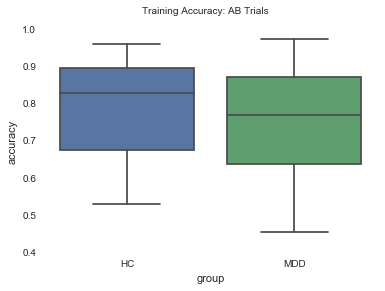

In [164]:
# If the above analysis is correct then it implies there should be a group difference in AB accuracy . . . 
# . . . and there was, but no longer; even if we get back to p < 0.05, it's clear this isn't a very strong result.

train_ab = train_clean[train_clean.pair == 'AB']
df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

print 100*(df.groupby('group')['accuracy'].mean())
print 100*(df.groupby('group')['accuracy'].std())

misc.ttest_2s(df[df.group == 'HC']['accuracy'],df[df.group == 'MDD']['accuracy'],paired=False)

sns.boxplot(y='accuracy',x='group',data=df)
sns.plt.suptitle('Training Accuracy: AB Trials')
sns.plt.savefig(path2figs + 'RMD_PST_Train_AB_ACC.pdf')

## PST Ratings

In [165]:
%cd {path2data}

rate_dfs = []
rate_d = re.compile('_PST_fMRI_ratings')

subjects = !ls -d RMD0*

for sub in subjects:
    
    group = train_full[train_full.subject == sub]['group'].unique()
    if group: # Some subjects (RMD001, RMD002) don't have a group so need to check for that before . . . 
        group = group[0] # . . . pulling the group name out of the list.
    else:
        group = 'none'
        
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            rate_m = rate_d.search(filename)
            if rate_m:
                file_path = curr_path + filename
                rate_df = pd.read_csv(file_path)
                rate_df['group'] = group
                rate_df['subject'] = sub
                rate_dfs.append(rate_df)
                
PST_rate = pd.concat(rate_dfs)
ratings_columns = ['subject','group','stimulus','prompt','rating']
PST_rate = PST_rate.reindex(columns=ratings_columns)
PST_rate = PST_rate[~(PST_rate.group == 'none')] # Drop the pilots
PST_rate = PST_rate[~(PST_rate.subject.isin(asleep))] # Drop the sleepy peeps

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [169]:
df = pd.merge(PST_rate,sr,on='subject')
rate = df[['subject','Age','group','stimulus','prompt','rating']]
rate.head()

subject  Age group stimulus   prompt  rating
0  RMD003   43   MDD   reward  valence       9
1  RMD003   43   MDD     zero  valence       1
2  RMD003   43   MDD   reward  arousal       8
3  RMD003   43   MDD     zero  arousal       2
4  RMD004   37    HC   reward  valence       9

In [171]:
# We've got one less subject in the ratings than in the training. Who is it? RMD045--makes sense, quit early (quitter)
print train_clean.subject.nunique()
print rate.subject.nunique()

for sub in train_clean.subject.unique():
    if sub not in rate.subject.unique():
        print sub

75
74
RMD045


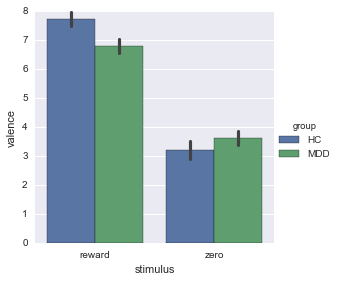

In [173]:
sns.set_style('darkgrid')
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=rate[rate.prompt == 'valence'])
sns.plt.ylabel('valence')
sns.plt.savefig(path2figs + 'PST_Valence.pdf')

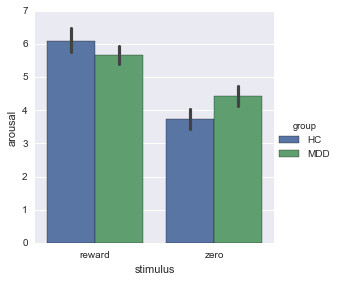

In [174]:
sns.factorplot(y='rating',x='stimulus',hue='group',hue_order=['HC','MDD'], units='subject',ci=68,kind='bar',
               data=rate[rate.prompt == 'arousal'])
sns.plt.ylabel('arousal')
sns.plt.savefig(path2figs + 'PST_Arousal.pdf')

In [175]:
# ANCOVAs 

%Rpush rate
%R valence = subset(rate, prompt == 'valence')
%R arousal = subset(rate, prompt == 'arousal')

print 'valence . . .'
%R valence.acov <- aov_ez(id='subject', dv='rating', data=valence, between='group', within=c('stimulus'),\
                        covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(valence.acov) # Main effect of Stim, plus Group x Stim

print '\narousal . . .'
%R arousal.acov <- aov_ez(id='subject', dv='rating', data=arousal, between='group', within=c('stimulus'),\
                        covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(arousal.acov) # Main effect of Stim, plus Group x Stim

valence . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE         F   pes p.value
1          group 1, 71 1.39      1.78   .02     .19
2            Age 1, 71 1.39      0.48  .007     .49
3       stimulus 1, 71 4.24 12.91 ***   .15   .0006
4 group:stimulus 1, 71 4.24    3.89 +   .05     .05
5   Age:stimulus 1, 71 4.24      0.01 .0002     .91

Sphericity correction method: GG 



arousal . . .


Anova Table (Type 3 tests)

Response: rating
          Effect    df  MSE      F   pes p.value
1          group 1, 71 4.14   0.15  .002     .70
2            Age 1, 71 4.14   0.24  .003     .62
3       stimulus 1, 71 3.02 4.59 *   .06     .04
4 group:stimulus 1, 71 3.02 3.85 +   .05     .05
5   Age:stimulus 1, 71 3.02   0.04 .0006     .84

Sphericity correction method: GG 


In [176]:
# Follow-ups on valence. Nice, group difference in valence for rewards, not zeros . . . 

%R valence.lsm <- lsmeans(valence.acov, ~ group*stimulus)
%R print(valence.lsm)
%R print(pairs(valence.lsm),adjust='none')

 group stimulus   lsmean        SE     df lower.CL upper.CL
 HC    reward   7.967934 0.4077732 126.09 7.160968 8.774899
 MDD   reward   7.037304 0.4185728 126.14 6.208970 7.865638
 HC    zero     3.441899 0.4077732 126.09 2.634934 4.248865
 MDD   zero     3.855330 0.4185728 126.14 3.026996 4.683664

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.9306299 0.3901681 112.09   2.385  0.0187
 HC,reward - HC,zero     4.5260342 0.4712934  70.00   9.603  <.0001
 HC,reward - MDD,zero    4.1126036 0.3901681 112.09  10.541  <.0001
 MDD,reward - HC,zero    3.5954043 0.3901681 112.09   9.215  <.0001
 MDD,reward - MDD,zero   3.1819736 0.4840161  70.00   6.574  <.0001
 HC,zero - MDD,zero     -0.4134306 0.3901681 112.09  -1.060  0.2916



In [177]:
# Follow-ups on arousal. Neither follow-up is sig but can see controls find rewards more arousing and zeros less
# arousing than the MDDs do . . . 

%R arousal.lsm <- lsmeans(arousal.acov, ~ group*stimulus)
%R print(arousal.lsm)
%R print(pairs(arousal.lsm),adjust='none')

 group stimulus   lsmean        SE    df lower.CL upper.CL
 HC    reward   6.377007 0.6089912 86.89 5.166549 7.587466
 MDD   reward   5.943693 0.6250147 86.91 4.701391 7.185995
 HC    zero     4.003314 0.6089912 86.89 2.792856 5.213773
 MDD   zero     4.694880 0.6250147 86.91 3.452577 5.937182

Confidence level used: 0.95 


 contrast                 estimate        SE     df t.ratio p.value
 HC,reward - MDD,reward  0.4333144 0.4437198 136.69   0.977  0.3305
 HC,reward - HC,zero     2.3736931 0.4022492  70.00   5.901  <.0001
 HC,reward - MDD,zero    1.6821279 0.4437198 136.69   3.791  0.0002
 MDD,reward - HC,zero    1.9403787 0.4437198 136.69   4.373  <.0001
 MDD,reward - MDD,zero   1.2488134 0.4131081  70.00   3.023  0.0035
 HC,zero - MDD,zero     -0.6915653 0.4437198 136.69  -1.559  0.1214



In [178]:
# Let's see if there's any relationship between AB accuracy during training and reward-zero difference scores for
# valence and/or arousal . . . create those difference scores in the next two cells . . . 

df = misc.MakeFrame(in_df=train_ab,id_vars=['group','subject'],dv='accuracy',agg_func='mean')
df.head()

group subject  accuracy
0    HC  RMD004  0.935897
1    HC  RMD005  0.531646
2    HC  RMD007  0.739726
3    HC  RMD009  0.925000
4    HC  RMD010  0.787500

In [179]:
valence = PST_rate[PST_rate.prompt == 'valence']
valence = valence.pivot(index='subject',columns='stimulus',values='rating')
valence.reset_index(inplace=True)
valence['valence_Rew_vs_Zero'] = valence['reward'] - valence['zero']
valence.head()

stimulus subject  reward  zero  valence_Rew_vs_Zero
0         RMD003       9     1                    8
1         RMD004       9     1                    8
2         RMD005       9     1                    8
3         RMD007       6     5                    1
4         RMD009       3     7                   -4

In [180]:
arousal = PST_rate[PST_rate.prompt == 'arousal']
arousal = arousal.pivot(index='subject',columns='stimulus',values='rating')
arousal.reset_index(inplace=True)
arousal['arousal_Rew_vs_Zero'] = arousal['reward'] - arousal['zero']
arousal.head()

stimulus subject  reward  zero  arousal_Rew_vs_Zero
0         RMD003       8     2                    6
1         RMD004       7     4                    3
2         RMD005       2     2                    0
3         RMD007       4     3                    1
4         RMD009       6     5                    1

In [181]:
# Now merge everything for the correlations . . . 
train_rate = pd.merge(valence,arousal,on='subject')
train_rate = train_rate[['subject','valence_Rew_vs_Zero','arousal_Rew_vs_Zero']]

train_corr = pd.merge(df,train_rate,on='subject')
train_corr.head()

group subject  accuracy  valence_Rew_vs_Zero  arousal_Rew_vs_Zero
0    HC  RMD004  0.935897                    8                    3
1    HC  RMD005  0.531646                    8                    0
2    HC  RMD007  0.739726                    1                    1
3    HC  RMD009  0.925000                   -4                    1
4    HC  RMD010  0.787500                    6                    3

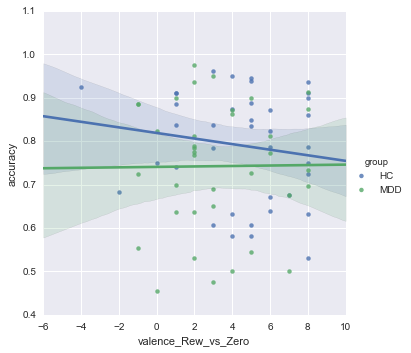

In [182]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='valence_Rew_vs_Zero',hue='group', data=train_corr)

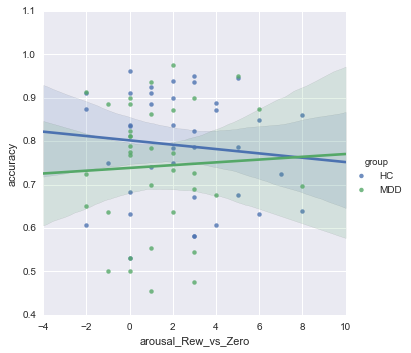

In [183]:
# No relationship . . . 
sns.lmplot(y='accuracy',x='arousal_Rew_vs_Zero',hue='group',data=train_corr)

# PST Test

In [191]:
'''Assemble the PST test data'''

%cd {path2data}

test_dfs = []
test_d = re.compile('PST_test')

subjects = !ls -d RMD0*

for sub in subjects:
    curr_path = path2data + sub + "/"
    for root, dirs, files in os.walk(curr_path):
        for filename in files:
            test_m = test_d.search(filename)
            if test_m:
                file_path = curr_path + filename
#                 print file_path
                test_df = pd.read_csv(file_path)
                test_df['subject'] = sub
                test_dfs.append(test_df)
                
test_data = pd.concat(test_dfs)
test_data['lnRT'] = test_data.trial_RT.apply(np.log)
test_columns = ['subject','group','block_id','trial_id','trial_RT','lnRT','trial_accuracy',
                'left_stim_name','left_stim_number','right_stim_name','right_stim_number',
                'response']
test_data = test_data[~(test_data.subject.isin(asleep))] # Drop the sleepy peeps

/Users/danieldillon/Work/Expts/REWMEM/Version4/Data


In [192]:
test_data['group'].replace(0, 'HC',inplace=True)
test_data['group'].replace(1, 'MDD',inplace=True)

test_data = test_data.reindex(columns=test_columns)

In [193]:
#Merging the PST test data with the self report data
test_full = pd.merge(left=test_data, right=sr, left_on='subject',right_on='subject')

In [194]:
# Looking for outliers . . . not bad 

test = OutCheck(test_full)

print 'Number of trials that are outliers for each subject:'
df2 = test[test['outlier'] == 1]
print df2.groupby('subject')['outlier'].count()

Number of trials that are outliers for each subject:
subject
RMD005    1
RMD009    1
RMD011    1
RMD012    2
RMD013    1
RMD014    4
RMD017    2
RMD018    2
RMD019    2
RMD020    1
RMD021    1
RMD023    1
RMD028    6
RMD029    5
RMD032    1
RMD033    1
RMD034    1
RMD035    1
RMD036    2
RMD037    1
RMD040    1
RMD041    1
RMD042    1
RMD045    1
RMD047    1
RMD048    1
RMD050    1
RMD051    1
RMD053    1
RMD054    1
RMD055    1
RMD056    1
RMD057    1
RMD058    1
RMD061    2
RMD064    1
RMD065    1
RMD067    1
RMD075    1
RMD076    1
RMD078    2
RMD079    1
RMD081    2
RMD084    1
RMD085    1
RMD086    1
RMD089    1
RMD091    1
RMD092    1
RMD093    1
RMD097    1
RMD098    1
Name: outlier, dtype: int64


In [195]:
# Count number of trials with no response, drop them, and drop outliers.
print 'Number of trials with no response: ' + str(len(test[test.trial_RT == 999])) 
test_clean = test[~((test.trial_RT == 999) | (test.outlier == 1))]

Number of trials with no response: 43


In [196]:
# Clean up the same variables that give R fits . . . 
test_clean.Education_Level = test_clean.Education_Level.astype(str)
test_clean.Occupation = test_clean.Occupation.astype(str)
test_clean['Highest Degree'] = test_clean['Highest Degree'].astype(str)
test_clean.Income = test_clean.Income.astype(str)
del test_clean['Notes']

In [197]:
#Make a pair column
def make_test_pair(data):
    '''Use left and right stimulus to output pair'''
    left_stim, right_stim = data
    d = {1:'A',2:'C',3:'E',4:'F',5:'D',6:'B'}
    left_char = d[left_stim]
    right_char = d[right_stim]
    pair = left_char + right_char
    return pair

test_clean['pair'] = test_clean[['left_stim_number','right_stim_number']].apply(make_test_pair, axis=1)

In [198]:
test_clean[['left_stim_number','right_stim_number','pair']].head()

left_stim_number  right_stim_number pair
0                 1                  2   AC
1                 5                  4   DF
2                 3                  6   EB
3                 3                  5   ED
4                 6                  5   BD

In [199]:
# Now code trials as ChooseA, AvoidB, or neither
def code_trial_type(pair):
    '''Categorize choice pairs as 'ChooseA', 'AvoidB', or 'neither'.'''
    
    if pair == 'AB' or pair == 'BA':
        choice = 'neither'
    elif 'A' in pair:
        choice = 'ChooseA'
    elif 'B' in pair:
        choice = 'AvoidB'
    else:
        choice = 'neither'
    
    return choice

test_clean['trial_type'] = test_clean.pair.apply(code_trial_type)
test_clean[['pair','trial_type']].head()

pair trial_type
0   AC    ChooseA
1   DF    neither
2   EB     AvoidB
3   ED    neither
4   BD     AvoidB

In [200]:
# Adding the difference/discrepany b/w stimuli in reinforcement rate and the participant's choice
def AddDisChoice(data):
    '''Given the left and right stim numbers, plus the subject's response, add the discrepancy b/w reward 
    probabilities for the stimuli, and the participant's choice.'''
    
    left_stim_number, right_stim_number, response = data
    choice = np.nan
    discrepancy = np.nan
    
    stims = {1:('A',80),2:('C',70),3:('E',60),4:('F',40),5:('D',30),6:('B',20)}
    
    discrepancy = np.abs(stims[left_stim_number][1] - stims[right_stim_number][1])
    
    if response == 'left':
        choice = stims[left_stim_number][0]
    elif response == 'right':
        choice = stims[right_stim_number][0]
    
    return (discrepancy,choice)

test_clean['difference'],test_clean['choice']= zip(*test_clean[['left_stim_number','right_stim_number',
                                                            'response']].apply(AddDisChoice,axis=1))

In [201]:
#Find out which participants responded <90% of the time -- none!
g = test_clean.groupby(['subject', 'group']).trial_id.count()
df = g.to_frame()
df.reset_index(inplace=True)

df.loc[(df["trial_id"] < 162)]

Empty DataFrame
Columns: [subject, group, trial_id]
Index: []

In [202]:
test_clean[['left_stim_number','right_stim_number','response','pair','choice','difference']].head()

left_stim_number  right_stim_number response pair choice  difference
0                 1                  2    right   AC      C          10
1                 5                  4    right   DF      F          10
2                 3                  6     left   EB      E          40
3                 3                  5     left   ED      E          30
4                 6                  5     left   BD      B          10

In [203]:
# Important, need to screen out people who perform poorly on test AB trials, logic being that if they cannot
# discriminate between the most obvious pair they've been tested on repeatedly, the rest of their data == worthless.
# Frank et al. (2004) drop anyone not > 50% accurate on AB test trials . . . let's see who that is . . . 

test_ab_drop = []
test_ab = test_clean[test_clean.pair == 'AB']
screen_test = misc.MakeFrame(in_df=test_ab,id_vars=['subject'],dv='trial_accuracy')
for i, row_i in screen_test.iterrows():
    if row_i.trial_accuracy < 0.501:
        print row_i.subject, row_i.trial_accuracy
        test_ab_drop.append(row_i.subject) # 9 subjects dropped . . . 

RMD007 0.0
RMD029 0.333333333333
RMD043 0.166666666667
RMD070 0.166666666667
RMD075 0.5
RMD078 0.5
RMD084 0.333333333333
RMD085 0.4
RMD091 0.4


In [204]:
# Dropping those 9 . . . leaves us with 35 controls and 31 MDDs . . . 
print test_clean.subject.nunique()
test_clean = test_clean[~(test_clean.subject.isin(test_ab_drop))]
print test_clean.subject.nunique()

test_clean.groupby('group')['subject'].nunique()

75
66


group
HC     35
MDD    31
Name: subject, dtype: int64

## Choose A vs. Avoid B

## RT

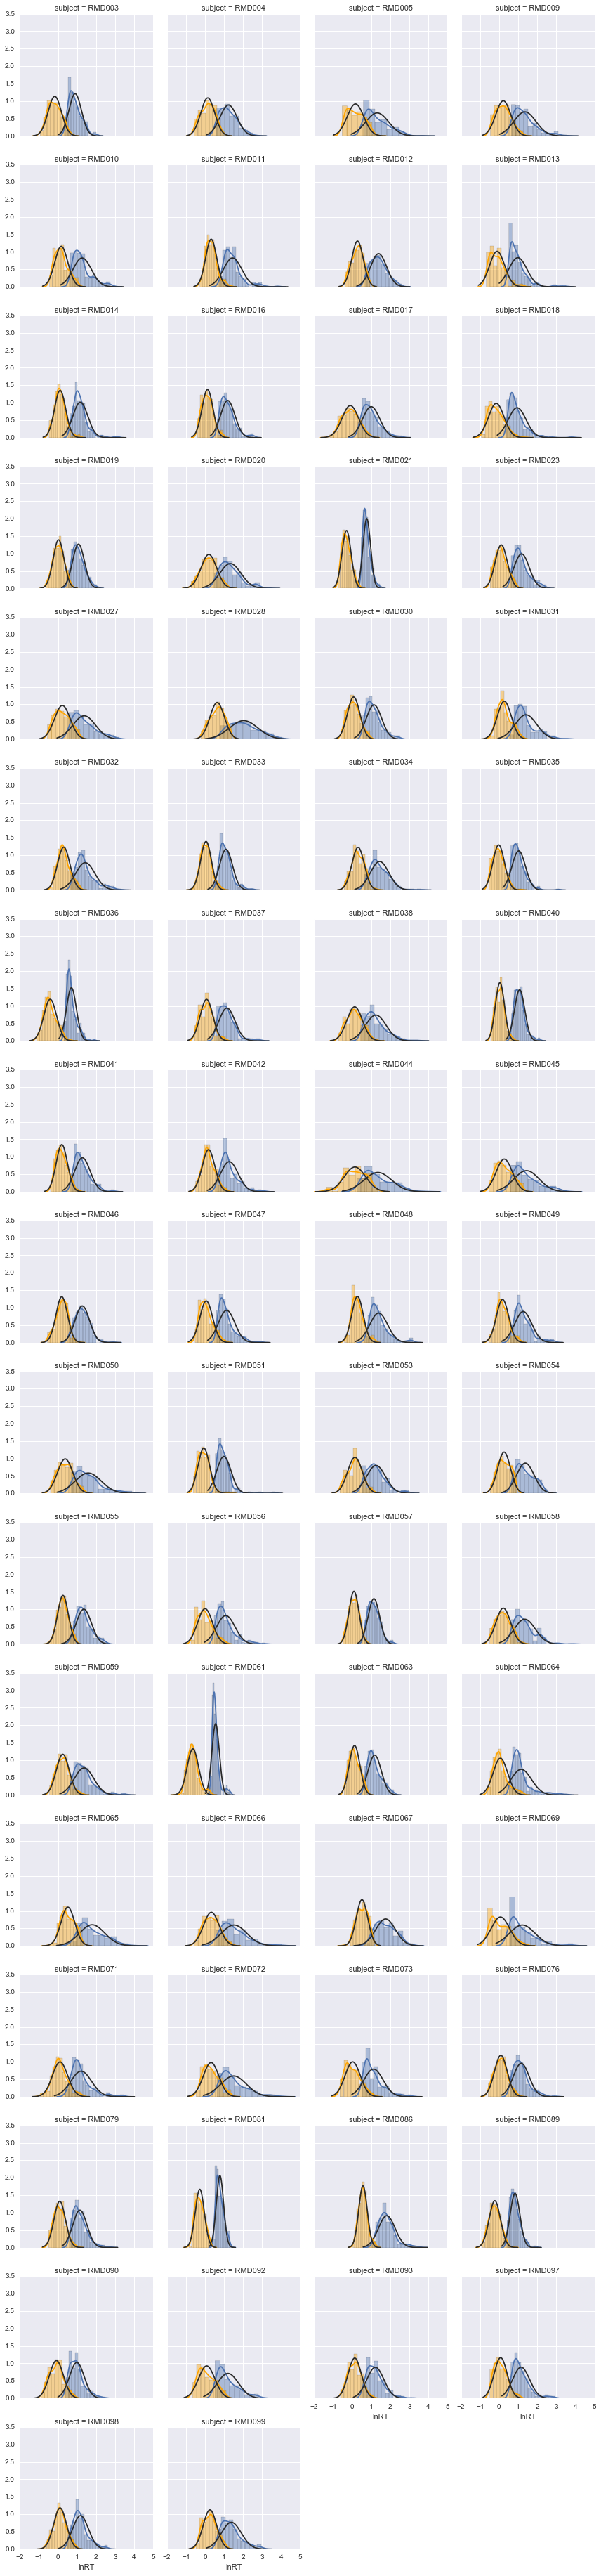

In [205]:
# We don't really need to plot this every time, but I like it because it very clear shows why we do the log transform.
# You can see that the blue distribution doesn't fit the normal distribution well because of the positive skew, which
# leaves the peak shifted left relative to normal. The orange (ln) distribution fits much better for most subjects.

# Single subject data, raw and log transformed RT with normal distribution overlaid.
g = sns.FacetGrid(data=test_clean,col='subject',col_wrap=4)
g.map(sns.distplot,'trial_RT',kde=True,fit=sp.stats.norm) 
g.map(sns.distplot,'lnRT',kde=True,fit=sp.stats.norm,color='orange')

In [206]:
chAavB = test_clean[~(test_clean.trial_type == 'neither')]

In [207]:
# ANCOVA on RT

%Rpush chAavB
# %R str(test_choice)

%R chAavB_rt.acov <- aov_ez(id='subject', dv='lnRT', data=chAavB, between='group',\
                            within=c('trial_type','trial_accuracy'),\
                            covariate='Age',factorize=FALSE, anova_table=list(correction='GG',es='pes'))
%R print(chAavB_rt.acov) # With Age in here, there is only a trend for an effect of trial type

Anova Table (Type 3 tests)

Response: lnRT
                            Effect    df  MSE      F   pes p.value
1                            group 1, 42 0.19   0.01 .0003     .91
2                              Age 1, 42 0.19   0.11  .003     .74
3                       trial_type 1, 42 0.06 2.90 +   .06     .10
4                 group:trial_type 1, 42 0.06   0.64   .02     .43
5                   Age:trial_type 1, 42 0.06   0.38  .009     .54
6                   trial_accuracy 1, 42 0.03   0.63   .01     .43
7             group:trial_accuracy 1, 42 0.03   1.27   .03     .27
8               Age:trial_accuracy 1, 42 0.03   0.09  .002     .76
9        trial_type:trial_accuracy 1, 42 0.05   2.38   .05     .13
10 group:trial_type:trial_accuracy 1, 42 0.05   0.01 .0002     .92
11   Age:trial_type:trial_accuracy 1, 42 0.05   1.20   .03     .28

Sphericity correction method: GG 


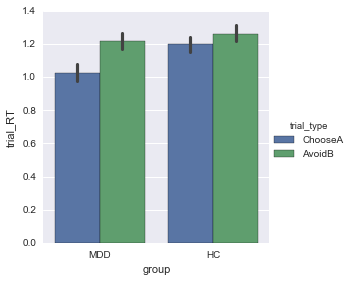

In [208]:
# This isn't justified by the ANCOVA, but let's check out what's happening with the groups . . . 
# Let's look at the Group x TT on correct trials . . . if anything, MDD < HC on Choose A (that's unexpected).

sns.factorplot(y='trial_RT',x='group',hue='trial_type',hue_order=['ChooseA','AvoidB'], units='subject',ci=68,
               kind='bar', data=chAavB[chAavB.trial_accuracy == 1], order = ['MDD','HC'])

In [209]:
# Let's get descriptives for the TT effect . . . people are faster on Choose A than on Avoid B
df = misc.MakeFrame(in_df=chAavB,id_vars=['group','subject','trial_type'],dv=['trial_RT','lnRT'])
df.head()

print df.groupby('trial_type')['trial_RT'].mean()
print df.groupby('trial_type')['trial_RT'].std()

trial_type
AvoidB     1.293428
ChooseA    1.150490
Name: trial_RT, dtype: float64
trial_type
AvoidB     0.284221
ChooseA    0.273357
Name: trial_RT, dtype: float64


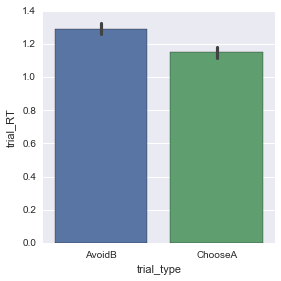

In [210]:
sns.factorplot(y='trial_RT', x='trial_type', units='subject', kind='bar', ci=68, data=df)
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_RT.pdf')

### Accuracy

In [211]:
# No effects at all on accuracy . . . not unusual for there to be no TT effect, was hoping we'd see a Group effect.
%R chAavB_acc.acov <- aov_ez(id='subject',dv='trial_accuracy', within='trial_type', between='group', data=chAavB,\
                           covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(chAavB_acc.acov)

Anova Table (Type 3 tests)

Response: trial_accuracy
            Effect    df  MSE    F   pes p.value
1            group 1, 63 0.04 0.04 .0007     .84
2              Age 1, 63 0.04 0.14  .002     .71
3       trial_type 1, 63 0.08 0.29  .005     .59
4 group:trial_type 1, 63 0.08 0.52  .008     .47
5   Age:trial_type 1, 63 0.08 0.31  .005     .58

Sphericity correction method: GG 


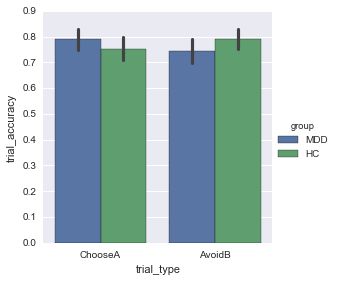

In [212]:
# Nothing doing, and if anything the MDDs are worse on Avoid B . . . interesting, and runs counter to my 
# "number of times you choose B during training predicts Avoid B accuracy at test" hypothesis.

sns.factorplot(y='trial_accuracy',x='trial_type',hue='group',units='subject',ci=68,kind='bar',data=chAavB,
              hue_order = ['MDD','HC'])
sns.plt.savefig(path2figs + 'PST_Test_ChA_vs_AvB_Acc.pdf')

In [213]:
# Typically there's a strong correlation b/w ChA-AvB accuracy and RT diffs at test, let's see if that's true for us

df = misc.MakeFrame(in_df=chAavB,id_vars=['subject','group','trial_type'],dv=['trial_accuracy','trial_RT'])
df.head()

subject group trial_type  trial_accuracy  trial_RT
0  RMD003   MDD     AvoidB        0.729167  0.899667
1  RMD003   MDD    ChooseA        0.416667  1.001396
2  RMD004    HC     AvoidB        0.937500  1.239604
3  RMD004    HC    ChooseA        0.958333  1.117208
4  RMD005    HC     AvoidB        0.979167  1.197042

In [214]:
chA = df[df.trial_type == 'ChooseA']
chA_cols = ['subject','group','trial_type','chA_acc','chA_RT']
chA.columns = chA_cols
chA = chA[['subject','group','chA_acc','chA_RT']]

avB = df[df.trial_type == 'AvoidB']
avB_cols = ['subject','group','trial_type','avB_acc','avB_RT']
avB.columns = avB_cols
avB = avB[['subject','avB_acc','avB_RT']]

both = pd.merge(chA,avB,on='subject')
both['chA_vs_avB_acc'] = both.chA_acc - both.avB_acc
both['chA_vs_avB_RT'] = both.chA_RT - both.avB_RT
both.head()

subject group   chA_acc    chA_RT   avB_acc    avB_RT  chA_vs_avB_acc  \
0  RMD003   MDD  0.416667  1.001396  0.729167  0.899667       -0.312500   
1  RMD004    HC  0.958333  1.117208  0.937500  1.239604        0.020833   
2  RMD005    HC  0.229167  1.352125  0.979167  1.197042       -0.750000   
3  RMD009    HC  0.729167  1.321875  0.979167  1.443562       -0.250000   
4  RMD010    HC  0.958333  1.255729  0.625000  1.352813        0.333333   

   chA_vs_avB_RT  
0       0.101729  
1      -0.122396  
2       0.155083  
3      -0.121688  
4      -0.097083

r = -0.690, p = 1.41e-10


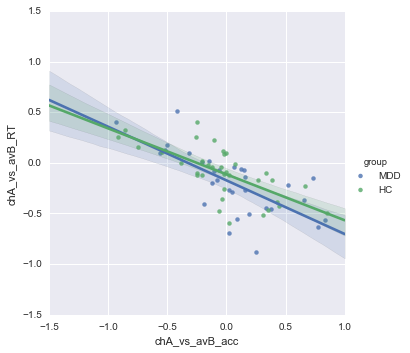

In [215]:
# Yup, as expected--looks good. 
sns.lmplot(y='chA_vs_avB_RT', x='chA_vs_avB_acc', hue='group', data=both)
sns.plt.savefig(path2figs + 'PST_Test_chA_avB_ACC_RT_correl.pdf')

r, p = sp.stats.pearsonr(both.chA_vs_avB_RT,both.chA_vs_avB_acc)
print 'r = ' + '{:.3f}'.format(r) + ', p = ' + '{:.3}'.format(p)

## Comparing win/win, lose/lose, and win/lose trials . . .  

Another thing we can do with the test data . . . win/win (high conflict Go) trials (AC, AE, CE) vs. lose/lose (high conflict NoGo trials) (BD, BF, DF), vs. win/lose (low conflict Go) trials (AD, AF, CB, CF, EB, ED).

In [216]:
test_clean.pair.unique()

array(['AC', 'DF', 'EB', 'ED', 'BD', 'FB', 'CE', 'EF', 'BA', 'AF', 'CD',
       'BC', 'CF', 'AD', 'AE', 'EC', 'BE', 'DA', 'FD', 'BF', 'DE', 'AB',
       'DB', 'FE', 'CB', 'CA', 'FA', 'EA', 'FC', 'DC'], dtype=object)

In [217]:
def CodeCon(pair):
    '''Code each pair as win/win (high conflict Go), lose/lose (high conflict NoGo), or win/lose (low conflict Go).'''
    
    trained = ['AB','BA','CD','DC','EF','FE']
    ww = ['AC','CA','AE','EA','CE','EC']
    ll = ['BD','DB','BF','FB','DF','FD']
    wl = ['AD','DA','AF','FA','CB','BC','CF','FC','EB','BE','ED','DE']
    
    if pair in trained:
        out = 'trained'
    elif pair in ww:
        out = 'WW'
    elif pair in ll:
        out = 'LL'
    elif pair in wl:
        out = 'WL'
    else:
        print "pair = " + pair + "; I don't recognize that pair, stopping!"
        out = 'none'
    
    return out

test_clean['con_trial_type'] = test_clean.pair.apply(CodeCon) # Conflict trial type

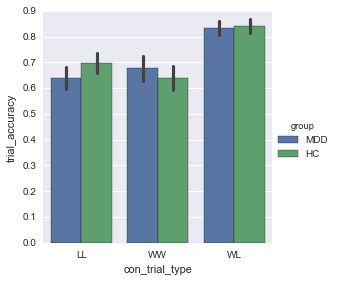

In [218]:
# Accuracy
sns.factorplot(y='trial_accuracy',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=test_clean[~(test_clean.con_trial_type == 'trained')])

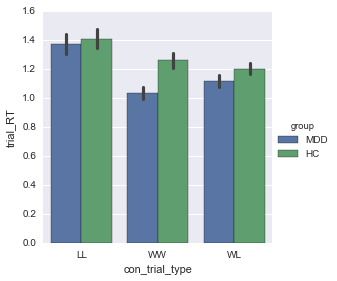

In [219]:
# Correct RT . . . only thing that looks sig here is faster MDD responses on W/W!
corr = test_clean[test_clean.trial_accuracy == 1]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=corr[~(corr.con_trial_type == 'trained')])

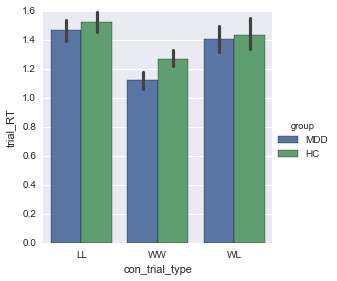

In [220]:
# Error RT
err = test_clean[test_clean.trial_accuracy == 0]
sns.factorplot(y='trial_RT',x='con_trial_type',hue='group',units='subject',ci=68,kind='bar',
               order=['LL','WW','WL'], data=err[~(err.con_trial_type == 'trained')])

In [234]:
# ANCOVAs on accuracy and RT 

test_clean.con_trial_type = test_clean.con_trial_type.astype(str)
con_test = test_clean[~((test_clean.con_trial_type == 'nan') | (test_clean.con_trial_type == 'trained'))]
con_clean = con_test[['subject','Age','group','con_trial_type','trial_accuracy','trial_RT','lnRT']]

%Rpush con_clean
# %R str(con_clean)

%R con_acc.acov <- aov_ez(id='subject',dv='trial_accuracy',within='con_trial_type',between='group',data=con_clean,\
                         covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'))
%R print(con_acc.acov) # With Age in, no sig effects . . . weird that the TT effect goes away, it is huge . . . 

%R con_RT.acov <- aov_ez(id='subject',dv='lnRT',within=c('con_trial_type','trial_accuracy'),between='group',\
                         covariate='Age',factorize=FALSE,anova_table=list(correction='GG',es='pes'), data=con_clean)

%R print(con_RT.acov) # Effects of TT and Accuracy, plus Group x TT and TT x Accuracy (also some Age stuff)

Anova Table (Type 3 tests)

Response: trial_accuracy
                Effect          df  MSE    F  pes p.value
1                group       1, 63 0.05 0.15 .002     .70
2                  Age       1, 63 0.05 0.58 .009     .45
3       con_trial_type 1.53, 96.61 0.07 1.51  .02     .23
4 group:con_trial_type 1.53, 96.61 0.07 0.48 .008     .57
5   Age:con_trial_type 1.53, 96.61 0.07 0.60 .009     .51

Sphericity correction method: GG 


Anova Table (Type 3 tests)

Response: lnRT
                                Effect          df  MSE      F   pes p.value
1                                group       1, 47 0.35   2.24   .05     .14
2                                  Age       1, 47 0.35   0.51   .01     .48
3                       con_trial_type 1.92, 90.25 0.03 2.48 +   .05     .09
4                 group:con_trial_type 1.92, 90.25 0.03 4.21 *   .08     .02
5                   Age:con_trial_type 1.92, 90.25 0.03   0.01 .0003     .98
6                       trial_accuracy       1, 47 0.02   1.36   .03     .25
7                 group:trial_accuracy       1, 47 0.02   0.80   .02     .37
8                   Age:trial_accuracy       1, 47 0.02   1.62   .03     .21
9        con_trial_type:trial_accuracy 1.92, 90.03 0.04   1.61   .03     .21
10 group:con_trial_type:trial_accuracy 1.92, 90.03 0.04   0.03 .0007     .96
11   Age:con_trial_type:trial_accuracy 1.92, 90.03 0.04   0.25  .005     .77

Sphericity correction method: GG

In [237]:
# Follow-up on the main effect of Trial Type for accuracy: WL > WW|LL.
%R con_acc.lsm <- lsmeans(con_acc.acov, ~ con_trial_type)
%R print(con_acc.lsm)
%R print(pairs(con_acc.lsm))

 con_trial_type    lsmean         SE    df  lower.CL  upper.CL
 LL             0.6295188 0.06010394 84.57 0.5100072 0.7490304
 WL             0.8012189 0.06010394 84.57 0.6817073 0.9207305
 WW             0.6189017 0.06010394 84.57 0.4993900 0.7384133

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast    estimate         SE  df t.ratio p.value
 LL - WL  -0.17170011 0.04036981 124  -4.253  0.0001
 LL - WW   0.01061712 0.04036981 124   0.263  0.9626
 WL - WW   0.18231724 0.04036981 124   4.516  <.0001

Results are averaged over the levels of: group 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [239]:
# RT: Follow-up on the Group x TT interaction. Impression for the graph confirmed, MDD < HC for WW trials only.
# Needless to say, this is unexpected . . . 
%R gXcon_RT.lsm <- lsmeans(con_RT.acov, ~ group*con_trial_type)
%R print(gXcon_RT.lsm)
%R print(pairs(gXcon_RT.lsm),adjust='none')

 group con_trial_type      lsmean        SE    df    lower.CL  upper.CL
 HC    LL              0.25368678 0.1089873 57.26  0.03546495 0.4719086
 MDD   LL              0.22617353 0.1183970 57.01 -0.01091115 0.4632582
 HC    WL              0.18175060 0.1093279 57.97 -0.03709566 0.4005969
 MDD   WL              0.07819930 0.1184014 57.02 -0.15889334 0.3152919
 HC    WW              0.10437522 0.1090194 57.33 -0.11390549 0.3226559
 MDD   WW             -0.06224722 0.1185148 57.24 -0.29954748 0.1750530

Results are averaged over the levels of: trial_accuracy 
Confidence level used: 0.95 


 contrast           estimate         SE     df t.ratio p.value
 HC,LL - MDD,LL   0.02751325 0.07419893  70.82   0.371  0.7119
 HC,LL - HC,WL    0.07193618 0.03432308 116.00   2.096  0.0383
 HC,LL - MDD,WL   0.17548748 0.07420587  70.85   2.365  0.0208
 HC,LL - HC,WW    0.14931156 0.03124079 116.00   4.779  <.0001
 HC,LL - MDD,WW   0.31593400 0.07438660  71.48   4.247  0.0001
 MDD,LL - HC,WL   0.04442293 0.07469840  72.58   0.595  0.5539
 MDD,LL - MDD,WL  0.14797424 0.03329245 116.00   4.445  <.0001
 MDD,LL - HC,WW   0.12179832 0.07424613  70.99   1.640  0.1053
 MDD,LL - MDD,WW  0.28842075 0.03448123 116.00   8.365  <.0001
 HC,WL - MDD,WL   0.10355130 0.07470529  72.61   1.386  0.1699
 HC,WL - HC,WW    0.07737538 0.03462793 116.00   2.234  0.0274
 HC,WL - MDD,WW   0.24399782 0.07488482  73.24   3.258  0.0017
 MDD,WL - HC,WW  -0.02617592 0.07425307  71.01  -0.353  0.7255
 MDD,WL - MDD,WW  0.14044652 0.03452598 116.00   4.068  0.0001
 HC,WW - MDD,WW   0.16662244 0.07443369  71.65   2.239 

In [240]:
# RT: follow-up of the accuracy x TT interaction: errors are slower than correct responses for WL, LL, not WW.
%R AccTT_RT.lsm <- lsmeans(con_RT.acov, ~ trial_accuracy*con_trial_type)
%R print(AccTT_RT.lsm)
%R print(pairs(AccTT_RT.lsm),adjust='none')

 trial_accuracy con_trial_type       lsmean        SE    df    lower.CL
 X0             LL              0.283269699 0.1088331 58.37  0.06544602
 X1             LL              0.196590614 0.1088331 58.37 -0.02123307
 X0             WL              0.249691183 0.1090092 58.75  0.03154460
 X1             WL              0.010258715 0.1090092 58.75 -0.20788786
 X0             WW              0.047530342 0.1089146 58.54 -0.17044281
 X1             WW             -0.005402344 0.1089146 58.54 -0.22337550
  upper.CL
 0.5010934
 0.4144143
 0.4678378
 0.2284053
 0.2655035
 0.2125708

Results are averaged over the levels of: group 
Confidence level used: 0.95 


 contrast         estimate         SE     df t.ratio p.value
 X0,LL - X1,LL  0.08667908 0.03304377 161.74   2.623  0.0095
 X0,LL - X0,WL  0.03357852 0.03410423 223.38   0.985  0.3259
 X0,LL - X1,WL  0.27301098 0.03333215 230.53   8.191  <.0001
 X0,LL - X0,WW  0.23573936 0.03318559 223.38   7.104  <.0001
 X0,LL - X1,WW  0.28867204 0.03303227 233.34   8.739  <.0001
 X1,LL - X0,WL -0.05310057 0.03333215 230.53  -1.593  0.1125
 X1,LL - X1,WL  0.18633190 0.03410423 223.38   5.464  <.0001
 X1,LL - X0,WW  0.14906027 0.03303227 233.34   4.513  <.0001
 X1,LL - X1,WW  0.20199296 0.03318559 223.38   6.087  <.0001
 X0,WL - X1,WL  0.23943247 0.03420394 160.84   7.000  <.0001
 X0,WL - X0,WW  0.20216084 0.03487615 223.38   5.797  <.0001
 X0,WL - X1,WW  0.25509353 0.03358832 227.83   7.595  <.0001
 X1,WL - X0,WW -0.03727163 0.03358832 227.83  -1.110  0.2683
 X1,WL - X1,WW  0.01566106 0.03487615 223.38   0.449  0.6538
 X0,WW - X1,WW  0.05293269 0.03358564 161.39   1.576  0.1170

Results are averaged ov

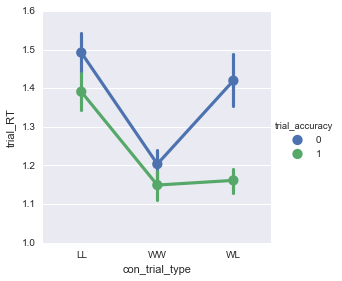

In [241]:
# Here's a look at the accuracy x TT effect on RT . . .
sns.factorplot(y='trial_RT',x='con_trial_type',hue='trial_accuracy',units='subject',ci=68,
               order=['LL','WW','WL'], data=con_clean[~(con_clean.con_trial_type == 'trained')])

### Looking at the relationship between training accuracy, the discrepancy b/w reinforcment rates for specific stimuli, and test accuracy 

The bottom line so far is that it's very clear there is a trainining accuracy x reinforcement difference interaction, but it's not clear that this varies in a substantive way by group . . . 

In [242]:
# Give me the overall accuracy, collapsed across pair and block, at training for each subject
train_acc = misc.MakeFrame(in_df=train_clean,id_vars='subject',dv='accuracy',agg_func='mean')
new_cols = ['subject','train_acc']
train_acc.columns = new_cols
train_acc.head()

subject  train_acc
0  RMD003   0.820084
1  RMD004   0.772152
2  RMD005   0.544304
3  RMD007   0.654709
4  RMD009   0.799163

In [243]:
# Now merge those data on training accuracy with the test data
test_train = pd.merge(test_clean,train_acc,on='subject')
test_train.head()
test_train = test_train[~(test_train.con_trial_type == 'trained')] # No trained pairs, want to know about generalizing

In [244]:
# Now generate a df that has each subject's overall training accuracy, plus their mean test accuracy as a function 
# of the difference in reinforcement rates for the pairs onscreen at test (AC = 10% diff, 80 vs. 70%, AD = 50%, etc).

df = misc.MakeFrame(in_df=test_train,id_vars=['subject','group','Age','difference','train_acc'],
                    dv='trial_accuracy',agg_func='mean')
df.head()

subject group  Age  difference  train_acc  trial_accuracy
0  RMD003   MDD   43          10   0.820084        0.395833
1  RMD003   MDD   43          20   0.820084        0.375000
2  RMD003   MDD   43          30   0.820084        0.833333
3  RMD003   MDD   43          40   0.820084        0.750000
4  RMD003   MDD   43          50   0.820084        0.791667

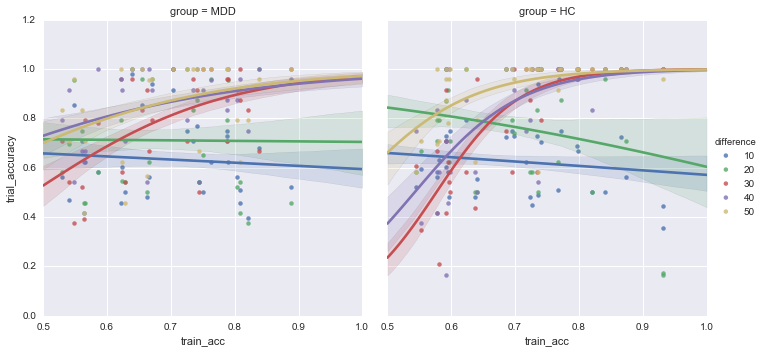

In [245]:
# Looks like the interaction is a bit steeper in controls--that for well-trained individuals, the accuracy difference
# b/w the least discrepant pairs (10/20% diff) and the other pairs is bigger in HC vs. MDD . . . 

sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,
           col='group',data=df)

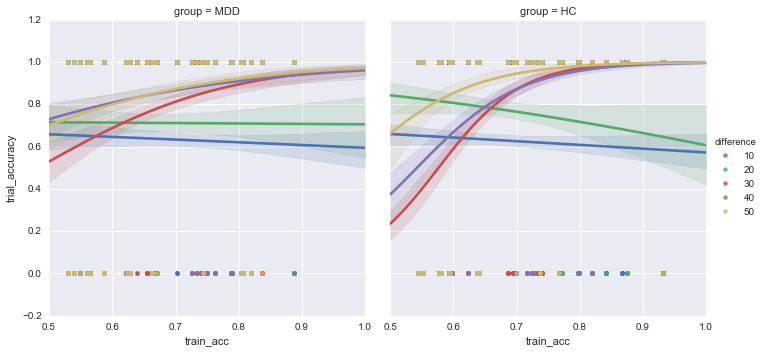

In [246]:
# Same graph but using the unaggregated data . . . .just confirming that the result is basically the same

sns.lmplot(y='trial_accuracy',x='train_acc',logistic=True,hue='difference',units='subject',ci=68,
           col='group',data=test_train)

Haven't re-run the code below with Age in, lmer keeps hanging . . .

In [ ]:
# I ran lmer on df but I don't think that's right b/c you want to work with logistic regression here (that's what 
# the graphs use), and so I think you need to use test_train as the data . . . (incidentally, I'm just thinking 
# aloud here, so "I" and "you" both refer to me:)

# I used deviance coding for group here but dummy coding for difference--this is the easiest for me to understand.
# If my thinking is correct, I believe I'm seeing a Group x Training Accuracy x Difference effect, relative to
# what's seen when Difference = 10, when Difference is 30, 40, or 50, but not when Difference = 20. Looking at
# the graphs, I think this reflects two things: (a) when the Difference is 50, it looks like HC > MDD roughly
# independent of training accuracy, but (b) when the Difference is 30 or 40, it looks like MDD > HC for lower
# training accuracy, with that group difference vanishing at higher training accuracies.

# Also notice that if you set training accuracy aside, you still get Group x Difference interactions at every level
# (it's a trend, with MDD > HC, when difference = 20)

test_train.con_trial_type = test_train.con_trial_type.astype(str)
test_train.WTAR_NatEng = test_train.WTAR_NatEng.astype(str)
test_train['group_FX'] = test_train.group.replace({'HC':-1,'MDD':1})

tt_clean = test_train[['subject','group_FX','Age','difference','train_acc','trial_accuracy']]

%Rpush tt_clean
# %R test_train$difference <- scale(test_train$difference)
%R tt_clean$difference <- as.factor(tt_clean$difference)
# %R str(tt_clean)

%R test_train.fm1 <- glmer(trial_accuracy ~ Age + difference*train_acc + (1|subject), family=binomial,\
                           control=glmerControl(optimizer="bobyqa",\
                                                optCtrl=list(maxfun=2e5)), data=tt_clean)
%R test_train.fm2 <- glmer(trial_accuracy ~ Age + difference*train_acc*group_FX + (1|subject), family=binomial,\
                           control=glmerControl(optimizer="bobyqa",\
                                                optCtrl=list(maxfun=2e5)), data=tt_clean)

%R test_train.aov <- anova(test_train.fm1,test_train.fm2)
%R print(test_train.aov)
%R print(summary(test_train.fm2))

In [205]:
# I think following up the triple interaction w/o some re-coding is going to be a bear b/c training accuracy
# is continuous. I think it will be much easier if we split training accuracy into groups (50-60, 60-70, etc).

def TrainAccGroup(accuracy):
    if accuracy < 0.60:
        group = '50-59'
    elif accuracy >= 0.60 and accuracy < 0.70:
        group = '60-69'
    elif accuracy >= 0.70 and accuracy < 0.80:
        group = '70-79'
    elif accuracy >= 0.80 and accuracy < 0.90:
        group = '80-89'
    elif accuracy >= 0.90:
        group = '90+'
    
    return group

df['train_acc_group'] = df.train_acc.apply(TrainAccGroup)

(0.0, 1.05)

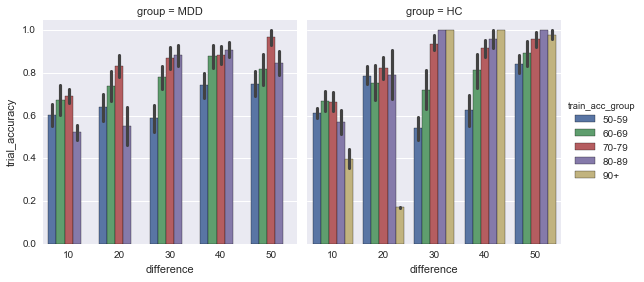

In [185]:
# This is interesting. First, notice that there are no 90+ subjects in the MDD group--only HCs achieved that level of
# training accuracy. Second, notice how poorly the 90+ group does with differences of 10/20% . . . I'm not sure why
# this is but a safe conclusion is that high training accuracy does not imply better ability to discriminate b/w small
# differences (this is true for 80-89 group too, they are second worse [behind 90+] for 10% diffs). Third, the HC
# group, ~regardless of training accuracy, does better than the MDD group when the difference is 40/50. Let's
# put this into an ANOVA.

# By the way, the easiest way to see the effect from the early graphs is to notice that for the 70,80,90 groups,
# accuracy really doesn't change much once you get to differences of 30+. By contrast, for the 50 and 60 groups,
# there is a ~linear increase in accuracy as differences go from 30 to 40 to 50.

sns.factorplot(y='trial_accuracy',x='difference',hue='train_acc_group',col='group',units='subject',ci=68,kind='bar',
               hue_order=['50-59','60-69','70-79','80-89','90+'],data=df)
sns.plt.ylim(0.0,1.05)

In [246]:
# This is pure cherry-picking--total gofp stuff--but I tried some more principled approaches before with nothing much
# coming of it, so here I'm testing group diffs that look large and seeing what (if anything) comes of it . . . 
# . . . these two don't come out, and that makes me think that this approach is basically a dead end:(
misc.ttest_2s(df[(df.group == 'HC') & (df.train_acc_group == '80-89') & (df.difference == 50)]['trial_accuracy'],
              df[(df.group == 'MDD') & (df.train_acc_group == '80-89') & (df.difference == 50)]['trial_accuracy'])

misc.ttest_2s(df[(df.group == 'HC') & (df.train_acc_group == '80-89') & (df.difference == 30)]['trial_accuracy'],
              df[(df.group == 'MDD') & (df.train_acc_group == '80-89') & (df.difference == 30)]['trial_accuracy'])

t(8) = 2.16, p = 0.063, g = 1.394
t(8) = 1.85, p = 0.101, g = 1.197


(1.8541624027073189, 0.10083038159374806, 1.196856684474896)

In [247]:
# Because there are no MDDs in the 90+ group, we need to drop that group for the ANOVA. First let's see how many
# people have achieved the different levels of training accuracy, by group . . . even this isn't so clear, because 
# although there are 2 HCs vs 0 MDDs in the 90+ group, there are 6 MDDs vs. 4 HCs in the 80-89 group . . .

g = df.groupby(['group','subject','train_acc_group'])['trial_accuracy'].mean()
g = g.to_frame()
g.reset_index(inplace=True)

h = g.groupby('group')['train_acc_group'].value_counts()
h = h.to_frame()
h.reset_index(inplace=True)
new_cols = ['group','train_acc_group','n_per_group']
h.columns = new_cols
h.head(10)

group train_acc_group  n_per_group
0    HC           70-79           12
1    HC           50-59           11
2    HC           60-69            6
3    HC           80-89            4
4    HC             90+            2
5   MDD           70-79           10
6   MDD           60-69            8
7   MDD           50-59            7
8   MDD           80-89            6

In [222]:
# ANOVA yields main effects of training accuracy and difference, plus a  training accuracy x difference interaction, 
# but no effects involving group . . . 

dfc = df[~(df.train_acc_group == '90+')] # dfc = 'df cleaned'
%Rpush dfc
%R str(dfc)
%R dfc$difference <- as.factor(dfc$difference)

%R dfc.aov <- aov_ez(id='subject',dv='trial_accuracy',within='difference',between=c('train_acc_group','group'),\
                   data=dfc,anova_table=list(correction='GG',es='pes'))
%R print(dfc.aov)

'data.frame':	320 obs. of  6 variables:
 $ subject        : Factor w/ 64 levels "RMD003","RMD004",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ group          : Factor w/ 2 levels "HC","MDD": 2 2 2 2 2 1 1 1 1 1 ...
 $ difference     : int  10 20 30 40 50 10 20 30 40 50 ...
 $ train_acc      : num  0.82 0.82 0.82 0.82 0.82 ...
 $ trial_accuracy : num  0.396 0.375 0.833 0.75 0.792 ...
 $ train_acc_group: Factor w/ 4 levels "50-59","60-69",..: 4 4 4 4 4 3 3 3 3 3 ...


Anova Table (Type 3 tests)

Response: trial_accuracy
                            Effect           df  MSE         F pes p.value
1                  train_acc_group        3, 56 0.07  7.98 *** .30   .0002
2                            group        1, 56 0.07      1.33 .02     .25
3            train_acc_group:group        3, 56 0.07      0.68 .04     .57
4                       difference 2.86, 160.43 0.02 32.32 *** .37  <.0001
5       train_acc_group:difference 8.59, 160.43 0.02  4.77 *** .20  <.0001
6                 group:difference 2.86, 160.43 0.02      2.12 .04     .10
7 train_acc_group:group:difference 8.59, 160.43 0.02      1.01 .05     .43

Sphericity correction method: GG 


## Win-stay/lose-shift

In [248]:
def WinStayCheck(df):
    '''For each pair, check on subject's last choice and feedback. If the last feedback was a reward and the subject
    sticks with the same choice, that's a win-stay trial. If the last feedback was a reward and subject changes choice,
    that's a win-shift trial. If the last feedback was a zero and the subject choice stays/shifts, that's lose-stay/
    lose-shift. Assumes the df has a column "ID".'''
    
    dfs = []
    for sub in df.subject.unique():
        
        d = {'AB':{'last_choice':'none','last_feedback':'none'},
             'CD':{'last_choice':'none','last_feedback':'none'},
             'EF':{'last_choice':'none','last_feedback':'none'}}
        
        sdf = df[df.subject == sub]
        tt = []
        for i, row_i in sdf.iterrows():
            if d[row_i.pair]['last_choice'] == 'none':
                tt.append(np.nan)

            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'reward'):
                tt.append('win-shift')
            
            elif (d[row_i.pair]['last_choice'] == row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-stay')
            
            elif (d[row_i.pair]['last_choice'] != row_i.choice) and (d[row_i.pair]['last_feedback'] == 'zero'):
                tt.append('lose-shift')

            d[row_i.pair]['last_choice'] = row_i.choice
            d[row_i.pair]['last_feedback'] = row_i.feedback
        
        sdf['trial_type'] = tt
    
        dfs.append(sdf)
    out = pd.concat(dfs)
    out.reset_index(inplace=True,drop=True)
    
    return out

In [249]:
train = WinStayCheck(train_clean)

In [259]:
train[['subject','trial_num','pair','choice','feedback','trial_type']].head(20)

subject  trial_num pair choice feedback  trial_type
0   RMD003          1   CD      D   reward         NaN
1   RMD003          2   EF      F     zero         NaN
2   RMD003          3   AB      A   reward         NaN
3   RMD003          4   AB      B     zero   win-shift
4   RMD003          5   CD      D     zero    win-stay
5   RMD003          6   EF      F     zero   lose-stay
6   RMD003          7   EF      E     zero  lose-shift
7   RMD003          8   CD      D     zero   lose-stay
8   RMD003          9   AB      B   reward   lose-stay
9   RMD003         10   EF      F   reward  lose-shift
10  RMD003         11   AB      B     zero    win-stay
11  RMD003         12   CD      C   reward  lose-shift
12  RMD003         13   EF      F     zero    win-stay
13  RMD003         14   AB      B     zero   lose-stay
14  RMD003         15   CD      C     zero    win-stay
15  RMD003         16   CD      D     zero  lose-shift
16  RMD003         17   EF      E   reward  lose-shift
17  RMD003         18   AB      B     zero   lose-stay
18  RMD003         19   AB      B     zero   lose-stay
19  RMD003         20   CD      C     zero  lose-shift

In [251]:
# Now how about a graph of the evolution of win-stay trials as a function of pair type and block number?
# First need to do some legwork . . . 

g = train.groupby(['subject','group','block','pair'])['trial_type'].value_counts()
df = g.to_frame()
df.reset_index(inplace=True)
new_cols = ['subject','group','block','pair', 'trial_type','count']
df.columns = new_cols
df.head()

# Now compute percentages
d = {}
for sub in df.subject.unique():
    for curr_block in range(1,5):
        for curr_pair in ['AB','CD','EF']:
            count_sum = df[(df.subject == sub) & (df.block == curr_block) & (df.pair == curr_pair)]['count'].sum()
            d[(sub,curr_block,curr_pair)] = count_sum #

# I'm sure there is a better way, but this works . . . 
pcts = []
for i, row_i in df.iterrows():
    count_sum = d[(row_i.subject,row_i.block,row_i.pair)]
    pct = float(row_i['count'])/count_sum
    pcts.append(pct)
df['pct'] = pcts

In [252]:
df.head()

subject group  block pair  trial_type  count       pct
0  RMD003   MDD      1   AB    win-stay      8  0.421053
1  RMD003   MDD      1   AB   lose-stay      7  0.368421
2  RMD003   MDD      1   AB  lose-shift      2  0.105263
3  RMD003   MDD      1   AB   win-shift      2  0.105263
4  RMD003   MDD      1   CD    win-stay      6  0.315789

In [253]:
df.tail()

subject group  block pair  trial_type  count   pct
3339  RMD099   MDD      4   CD  lose-shift      1  0.05
3340  RMD099   MDD      4   CD   win-shift      1  0.05
3341  RMD099   MDD      4   EF    win-stay     10  0.50
3342  RMD099   MDD      4   EF  lose-shift      5  0.25
3343  RMD099   MDD      4   EF   lose-stay      5  0.25

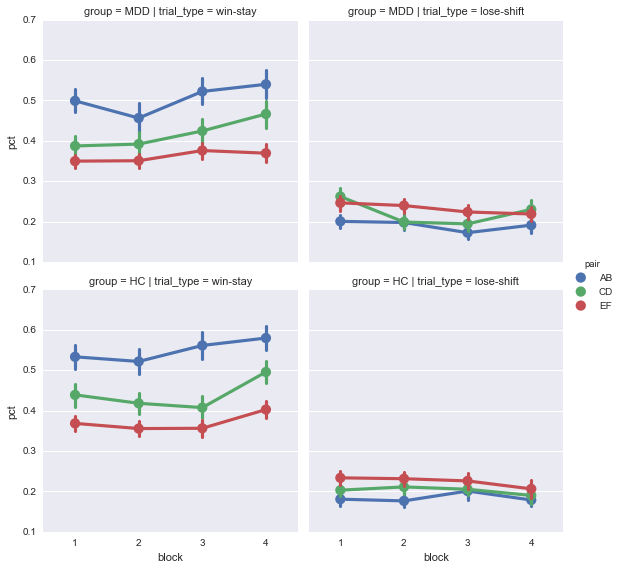

In [254]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',row='group',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

In [260]:
# Effects of Block, Pair, Trial_Type, and Pair x Trial_Type, with a trend for Group x TT
ws = df[(df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift')]

%Rpush ws
%R ws$block <- as.factor(ws$block)
# %R str(ws)

%R ws.aov <- aov_ez(id='subject',dv='pct',within=c('block','pair','trial_type'),between='group',data=ws,\
                   anova_table=list(correction='GG',es='pes'))
%R print(ws.aov)

Anova Table (Type 3 tests)

Response: pct
                        Effect           df  MSE         F  pes p.value
1                        group        1, 34 0.02      1.45  .04     .24
2                        block  2.77, 94.32 0.01    2.78 *  .08     .05
3                  group:block  2.77, 94.32 0.01      1.89  .05     .14
4                         pair  2.00, 67.96 0.01 21.53 ***  .39  <.0001
5                   group:pair  2.00, 67.96 0.01      0.73  .02     .49
6                   trial_type        1, 34 0.09 44.83 ***  .57  <.0001
7             group:trial_type        1, 34 0.09    3.35 +  .09     .08
8                   block:pair 4.32, 146.71 0.01      1.06  .03     .38
9             group:block:pair 4.32, 146.71 0.01      1.29  .04     .27
10            block:trial_type  2.54, 86.50 0.03      1.38  .04     .26
11      group:block:trial_type  2.54, 86.50 0.03      0.83  .02     .47
12             pair:trial_type  1.89, 64.22 0.03 13.67 ***  .29  <.0001
13       group:pair:tr

In [261]:
# Follow-up Pair x TT: more lose-shifts on EF vs. AB, more win-stays on AB vs. CD and/or EF, trend for CD > EF
%R ws.lsm <- lsmeans(ws.aov, ~ pair*trial_type)
%R print(ws.lsm)
%R print(pairs(ws.lsm))

 pair trial_type    lsmean         SE     df  lower.CL  upper.CL
 AB   lose.shift 0.2359425 0.01267695 139.77 0.2108791 0.2610058
 CD   lose.shift 0.2558952 0.01272358 141.30 0.2307421 0.2810484
 EF   lose.shift 0.2749982 0.01268089 139.68 0.2499269 0.3000695
 AB   win.stay   0.4783173 0.01267695 139.77 0.4532540 0.5033807
 CD   win.stay   0.3868390 0.01272358 141.30 0.3616859 0.4119922
 EF   win.stay   0.3514332 0.01268089 139.68 0.3263619 0.3765046

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast                         estimate         SE     df t.ratio p.value
 AB,lose.shift - CD,lose.shift -0.01995278 0.01345349 210.65  -1.483  0.6755
 AB,lose.shift - EF,lose.shift -0.03905572 0.01333205 207.38  -2.929  0.0432
 AB,lose.shift - AB,win.stay   -0.24237486 0.02333947 102.47 -10.385  <.0001
 AB,lose.shift - CD,win.stay   -0.15089658 0.02131792  76.94  -7.078  <.0001
 AB,lose.shift - EF,win.stay   -0.11549077 0.02126189  76.18  -5.432  <.0001
 CD,lose.shift - EF,lose.shift -0.01910294 0.01346465 207.18  -1.419  0.7156
 CD,lose.shift - AB,win.stay   -0.22242208 0.02131792  76.94 -10.434  <.0001
 CD,lose.shift - CD,win.stay   -0.13094380 0.02342029 103.53  -5.591  <.0001
 CD,lose.shift - EF,win.stay   -0.09553799 0.02125657  76.11  -4.495  0.0003
 EF,lose.shift - AB,win.stay   -0.20331914 0.02126189  76.18  -9.563  <.0001
 EF,lose.shift - CD,win.stay   -0.11184086 0.02125657  76.11  -5.261  <.0001
 EF,lose.shift - EF,win.stay   -0.07643505 0.02340177 103.29  -3.266  0.0180

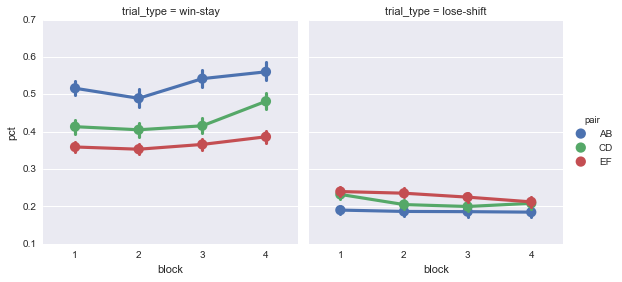

In [262]:
sns.factorplot(y='pct',x='block',hue='pair',col='trial_type',units='subject',ci=68,
               data=df[((df.trial_type == 'win-stay') | (df.trial_type == 'lose-shift'))])

## Modeling Training

In [263]:
# Re-code the data to make modeling easier . . . 

train['state'] = train.pair
train.state = train.state.replace({'AB':1,'CD':2,'EF':3})
train['action'] = train.choice
train.action = train.action.replace({'A':1,'C':2,'E':3,'F':4,'D':5,'B':6})
train['reward'] = train.feedback
train.reward = train.reward.replace({'zero':0,'reward':1})

In [264]:
def RL_eq(Q_old,fdbk,alpha_loss,alpha_gain):
    '''Given old Q value and feedback, compute new Q value, using different alphas for gains vs. losses.'''
    
    Q_new = np.nan
    PE = np.nan
    
    if fdbk == 1:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_gain * PE)
    
    elif fdbk == 0:
        PE = fdbk - Q_old
        Q_new = Q_old + (alpha_loss * PE)
    
    return (Q_new,PE)   

In [265]:
def SoftMax(Q_Chosen,Q_NotChosen,beta):
    '''Given Q values for actions chosen and not chosen, compute the probability of the chosen action via the
    softmax function.'''
    
    
    numerator = np.power(np.e,(Q_Chosen/beta))
    denomenator = numerator + (np.power(np.e,(Q_NotChosen/beta)))
    
    prob_chosen = numerator/denomenator
    
    return prob_chosen

In [266]:
def RL_likelihood(params,df):
    '''Given alpha_gain, alpha_loss, beta, and the df (rows of state, action, reward), return -logp.'''

    ag,al,b = params
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # All Q-values initialized to 0.5 (not good, not bad)

    logp = 0
    for i, row_i in df.iterrows():
        Qs = Q[row_i.state] # Get the Q values for this state
        Q_Chosen = Qs[row_i.action] # Give me the Q value for the chosen stimulus
        for k in Qs.keys(): # Look through the stimuli . . . 
            if k != row_i.action: # . . . if you see a stimulus that's not the chosen stimulus . . . 
                Q_NotChosen = Qs[k] # . .. then that must be the not-chosen stimulus, so give me its Q-value.

        prob_chosen = SoftMax(Q_Chosen,Q_NotChosen,b)
        logp = logp + np.log(prob_chosen)
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=al,alpha_gain=ag)
        Q[row_i.state][row_i.action] = Q_new

    # Use negative log likelihood because the optimizer will search for the minimum (thus = max LL).
    return -logp 

In [267]:
# Find the optimum alpha_gain, alpha_loss, and beta values for each subject

def OptFit(df):
    '''Given a df that consists of state, action, reward cols, use fmin to search for the best-fitting alpha_gain, 
    alpha_loss, and beta.'''
    
    opt_final = (0,99999999) # You're going to replace this w/opt_new, where you'll need to call item 1, so start now.
    
    # Optimize the model fit. For each subject, try three different sets of starting params to avoid converge fails.
    for params in [(0.1,0.1,1),(0.5,0.5,10),(0.9,0.9,19)]:
        
        opt_new = sp.optimize.fmin(RL_likelihood, [params[0], params[1], params[2]], args=(df,), full_output=True)
    
        if opt_new[1] < opt_final[1]:
            opt_final = opt_new
    
    best_ag = opt_new[0][0]
    best_al = opt_new[0][1]
    best_b = opt_new[0][2]
    min_val = opt_new[1]
    
    if best_ag < 0:
        best_ag = 0
    elif best_ag > 1:
        best_ag = 1
    
    if best_al < 0:
        best_al = 0
    elif best_al > 1:
        best_al = 1
           
    if best_b < 0:
        best_b = 0  
    elif best_b > 20:
        best_b = 20
    
    # Now that we have the best values, let's add them to the df.
    df['alpha_gain'] = best_ag
    df['alpha_loss'] = best_al
    df['beta'] = best_b
    
    # Now go through the df, with the best fitting alphas, and generate PE and Q on each trial.
    PEs = []
    Qs = []
    
    Q = {1:{1:0.5,6:0.5},2:{2:0.5,5:0.5},3:{3:0.5,4:0.5}} # Q-values initialized to 0.5 (not good, not bad)

    for i, row_i in df.iterrows():
        Q_new, PE = RL_eq(Q_old=Q[row_i.state][row_i.action],fdbk=row_i.reward,
                                             alpha_loss=best_al,alpha_gain=best_ag)
        Q[row_i.state][row_i.action] = Q_new
        Qs.append(Q_new)
        PEs.append(PE)
    df['Q'] = Qs
    df['PE'] = PEs
            
    return df

In [269]:
# out = []
# for sub in train.subject.unique():
#      df = OptFit(train[train.subject == sub])
#      out.append(df)

# model_train = pd.concat(out)
# model_train.to_csv(path2analysis + 'model_train.csv', index=False)

Optimization terminated successfully.
         Current function value: 98.642431
         Iterations: 88
         Function evaluations: 157
Optimization terminated successfully.
         Current function value: 98.642431
         Iterations: 163
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 109.477670
         Iterations: 157
         Function evaluations: 290
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 99
         Function evaluations: 180
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 141
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: 103.578379
         Iterations: 126
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 161.304644
         Iterations: 95
         Function evaluations: 166
Optimizatio

In [270]:
model_train.head()

index subject group  trial_num  block  trial_RT      lnRT  accuracy  \
0      0  RMD003   MDD          1      1     1.467  0.383219         0   
1      1  RMD003   MDD          2      1     1.134  0.125751         0   
2      2  RMD003   MDD          3      1     0.917 -0.086648         1   
3      3  RMD003   MDD          4      1     1.200  0.182322         0   
4      4  RMD003   MDD          5      1     1.500  0.405465         0   

       left_stim  left_stim_number ...  choice  trial_type  state  action  \
0  Stimuli/1.bmp                 2 ...       D         NaN      2       5   
1  Stimuli/4.bmp                 3 ...       F         NaN      3       4   
2  Stimuli/6.bmp                 1 ...       A         NaN      1       1   
3  Stimuli/6.bmp                 1 ...       B   win-shift      1       6   
4  Stimuli/5.bmp                 5 ...       D    win-stay      2       5   

  reward  alpha_gain  alpha_loss      beta         Q   PE  
0      1           1    0.342704  0.347334  1.000000  0.5  
1      0           1    0.342704  0.347334  0.328648 -0.5  
2      1           1    0.342704  0.347334  1.000000  0.5  
3      0           1    0.342704  0.347334  0.328648 -0.5  
4      0           1    0.342704  0.347334  0.657296 -1.0  

[5 rows x 92 columns]

In [271]:
model_train.alpha_gain.describe()

count    17622.000000
mean         0.455895
std          0.348075
min          0.006521
25%          0.142032
50%          0.376038
75%          0.775576
max          1.000000
Name: alpha_gain, dtype: float64

In [272]:
model_train.alpha_loss.describe()

count    17622.000000
mean         0.269154
std          0.313181
min          0.000000
25%          0.025904
50%          0.106184
75%          0.401674
max          1.000000
Name: alpha_loss, dtype: float64

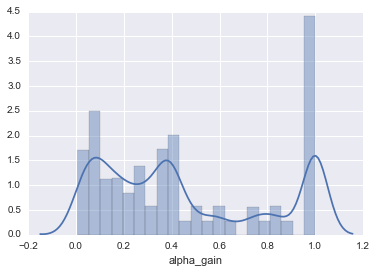

In [273]:
sns.distplot(model_train.alpha_gain)

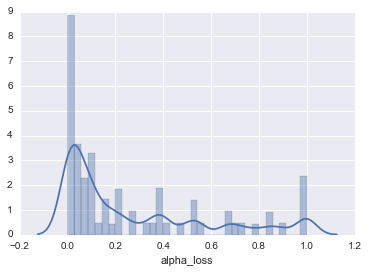

In [274]:
sns.distplot(model_train.alpha_loss)

In [275]:
model_train.beta.describe()

count    17622.000000
mean         0.904514
std          2.512280
min          0.023657
25%          0.183614
50%          0.303966
75%          0.550147
max         20.000000
Name: beta, dtype: float64

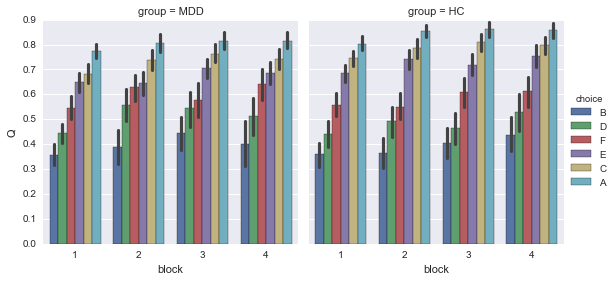

In [276]:
# Looks like Q for A may be a bit higher in HC . . . 
sns.factorplot(y='Q',x='block',hue='choice',hue_order=['B','D','F','E','C','A'],col='group',units='subject',
               kind='bar',ci=68,data=model_train)

In [281]:
# Group x Block x Choice ANOVA on Q values . . . main effects of Block and (esp) Choice, Group effects not close
model_trim = model_train[['subject','group','block','choice','Q','alpha_gain','alpha_loss']]
%Rpush model_trim
%R model_trim$block <- as.factor(model_trim$block)
# %R str(model_trim)

%R Q.aov <- aov_ez(id='subject',dv='Q',within=c('block','choice'),between='group',data=model_trim)
%R print(Q.aov)

Anova Table (Type 3 tests)

Response: Q
              Effect           df  MSE          F   ges p.value
1              group        1, 41 1.30       0.01 .0003     .91
2              block  1.93, 78.94 0.03    5.42 **  .004    .007
3        group:block  1.93, 78.94 0.03       0.22 .0002     .79
4             choice  2.03, 83.31 0.07 153.67 ***   .26  <.0001
5       group:choice  2.03, 83.31 0.07       0.19 .0004     .83
6       block:choice 6.26, 256.66 0.02       1.52  .002     .17
7 group:block:choice 6.26, 256.66 0.02       0.47 .0008     .84

Sphericity correction method: GG 


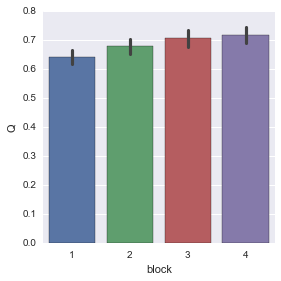

In [285]:
# Plotting Block effect on Q values
sns.factorplot(y='Q',x='block',units='subject',kind='bar',ci=68,data=model_trim)

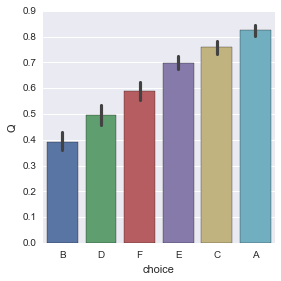

In [284]:
# Plotting Choice effect on Q values
sns.factorplot(y='Q',x='choice',order=['B','D','F','E','C','A'],units='subject',kind='bar',ci=68,data=model_trim)

In [289]:
# Figured I'd take a look at group difference in Q for choice A, as visually it looked best . . . not close to sig.
df = misc.MakeFrame(in_df=model_trim,id_vars=['group','subject','choice'],dv='Q')

misc.ttest_2s(df[(df.group == 'HC') & (df.choice == 'A')]['Q'],
              df[(df.group == 'MDD') & (df.choice == 'A')]['Q'])

t(73) = 0.93, p = 0.355, g = 0.215


(0.93092968914874796, 0.35495843925740944, 0.21500811533262199)

In [291]:
# Any difference in alpha gain or loss? Nope . . . 

df = misc.MakeFrame(in_df=model_trim,id_vars=['group','subject'],dv=['alpha_gain','alpha_loss'])
df.head()

misc.ttest_2s(df[df.group == 'HC']['alpha_gain'],df[df.group == 'MDD']['alpha_gain'])
misc.ttest_2s(df[df.group == 'HC']['alpha_loss'],df[df.group == 'MDD']['alpha_loss'])

t(73) = 0.54, p = 0.592, g = 0.124
t(73) = -0.17, p = 0.862, g = -0.040


(-0.17427208182078455, 0.86213404281190786, -0.040249991276615389)

In [292]:
def RunningTrials(data):
    '''Given block and trial numbers, return a continuous trial count.'''
    block, trial_num = data
    if block == 1:
        out = trial_num
    elif block == 2:
        out = trial_num + 60
    elif block == 3:
        out = trial_num + 120
    elif block == 4:
        out = trial_num + 180
    
    return out
model_train['trial_continuous'] = model_train[['block','trial_num']].apply(RunningTrials,axis=1)

/Users/danieldillon/anaconda/lib/python2.7/site-packages/seaborn/algorithms.py:76: RuntimeWarning: Mean of empty slice
  boot_dist.append(func(*sample, **func_kwargs))


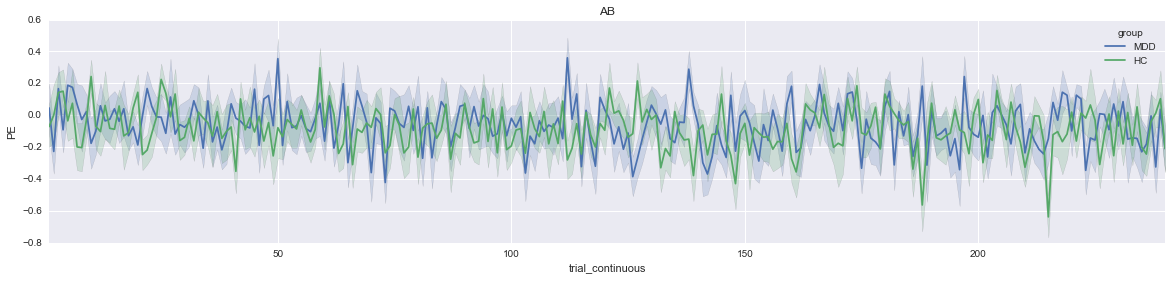

In [293]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax1= sns.tsplot(model_train[model_train.pair == 'AB'],value='PE',unit='subject',condition = 'group',
                time='trial_continuous', estimator=np.nanmean)
ax1.set_title('AB')

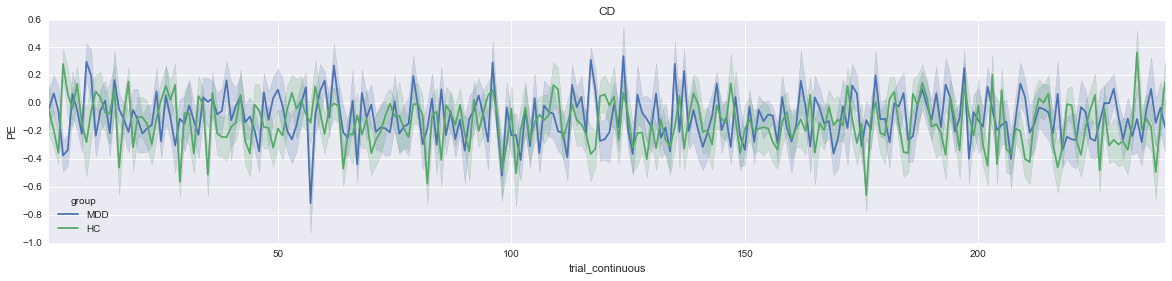

In [294]:
plt.subplots(figsize=(20, 4))
ax2 = sns.tsplot(model_train[model_train.pair == 'CD'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax2.set_title('CD')

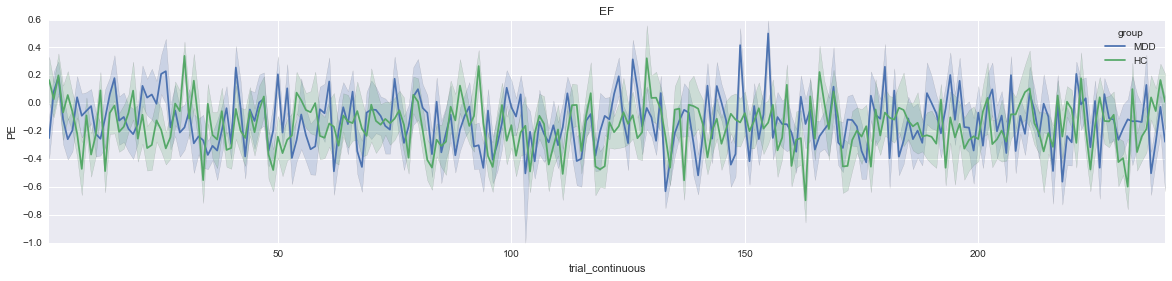

In [295]:
plt.subplots(figsize=(20, 4))
ax3 = sns.tsplot(model_train[model_train.pair == 'EF'],value='PE',unit='subject',condition = 'group',
                 time='trial_continuous',estimator=np.nanmean)
ax3.set_title('EF')

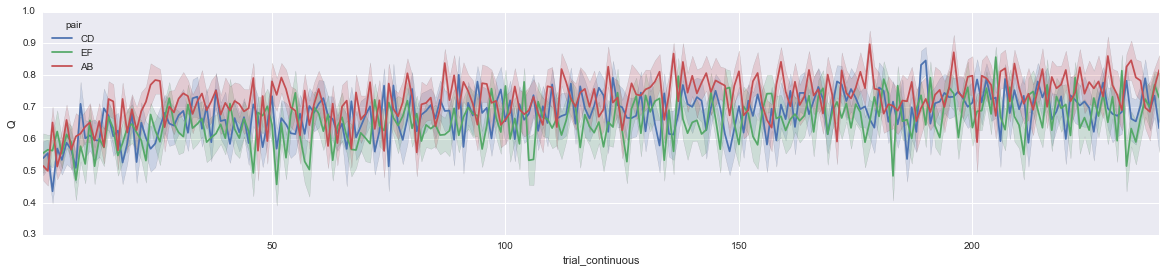

In [296]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
sns.tsplot(model_train,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)

In [297]:
model_HC = model_train[model_train.group == 'HC']

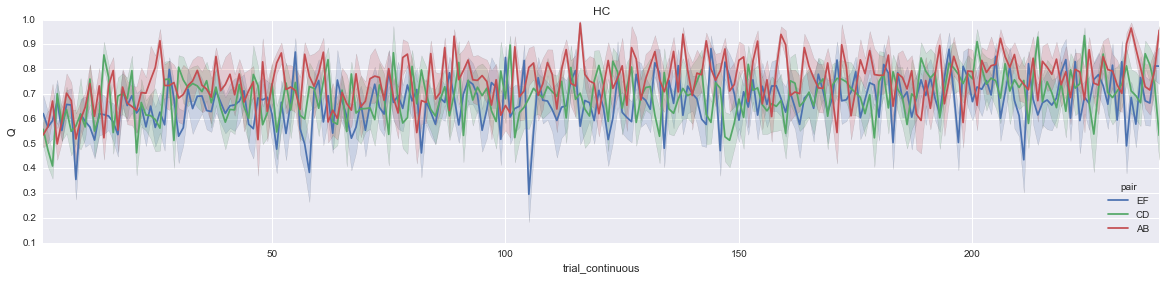

In [298]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax4 = sns.tsplot(model_HC,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax4.set_title('HC')

In [299]:
model_MDD = model_train[model_train.group == 'MDD']

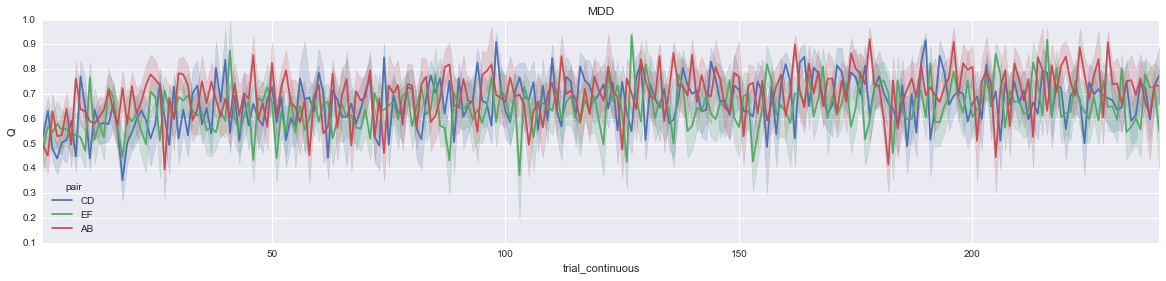

In [300]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20, 4))
ax5 = sns.tsplot(model_MDD,value='Q',unit='subject',time='trial_continuous',condition='pair',estimator=np.nanmean)
ax5.set_title('MDD')